<h1 align="center"> Analysis for Imbalanced Data</h1>

<h1 align="center"> Erinç Koç </h1>

<h2 align="center"> Outline </h2><br>

### Table of Contents

* [1) Import Libraries & Data ](#chapter1)
* [2) Data Analyses](#chapter2)
    * [2.1) Null Check](#section_2_1)
    * [2.2) Data Description](#section_2_2)
    * [2.3) Handle Missing Values](#section_2_3)
    * [2.4) Analysis for Numerical Columns](#section_2_4)
        * [2.4.1) Distribution Plot for Numerical Columns](#section_2_4_1)
        * [2.4.2) Normality Test for Numerical Columns](#section_2_4_2)
            * [2.4.2.1) Shapiro-Wilk Test](#section_2_4_2_1)
            * [2.4.2.2) Anderson Test](#section_2_4_2_2)
        * [2.4.3) Normality Test Results for Numerical Columns](#section_2_4_3)
        * [2.4.4) Outlier Detection for Numerical Columns](#section_2_4_4)
    * [2.5) Analysis for Categorical Columns](#section_2_5)
        * [2.5.1) Value Count Check for Categorical Columns](#section_2_5_1)
        * [2.5.2) Chi-square Test for Categorical Columns](#section_2_5_2)  
    * [2.6) Correlation Analyses](#section_2_6)
        * [2.6.1) Correlation Analyses for Numerical Columns ](#section_2_6_1)
        * [2.6.2) Correlation Analyses for Categorical Columns](#section_2_6_2)
        * [2.6.3) Correlation Analyses](#section_2_6_3)

### 1) Import Libraries & Data<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats
import matplotlib.cm as cm
import sys
import warnings

In [2]:
### display-related options
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_seq_items', 2000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
### ignore warning
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
### import data
data_master = pd.read_csv('CaseStudy_AnomalyDetection_202012.csv', sep=';')

In [5]:
### import column heading
column_name = pd.read_csv('column_name.csv', sep=';')

In [6]:
### change column names
data_master.rename(columns=dict(zip(column_name.column_old, column_name.column_new)), inplace=True)

In [7]:
data_master.head()

,Target,Restructured Credit Request YN,Customer GBF,CC_Num_of_application_L6M + LO_Num_of_application_L6M + MO_Num_of_application_L6M + OD_Num_of_application_L6M,KKB Bureau Score,CC Total Payment of all Credit cards,CC_Num_of_application_L1M + LO_Num_of_application_L1M + OD_Num_of_application_L1M,Employers Address YN,Branch and work adresses are the same,Main and application branch codes are the same,Müşteri Dönem Aktif,Monthly Family Income,OD Number of months in 1 delay_L24M,OD Number of months in 2 delay_L12M,CC Number of months in 2 delay_L24M,Kullandırım Hazırlık,Şube Müdürü Görüşü,Şube Kaps Kontrolü,CC Tot Limit YTL,Total_of_Monthly_Instalment / Total_Assets,CC_Total_Payment_of_all_Credit_cards / CC_Total_Balance_of_All_Credit_Cards,Worst Card Status ALL,Home Phone YN,Şube Pazarlama Eksiklik Görüşü,GUA_Num Unpaid Cheques L6M,Number of Limit Increase Rejects in L3M,Total_of_Monthly_Instalment / Monthly Net Income,Residential Status,Max Delinquency Status L6M,Num Unpaid Notes L7M_L12M,Aktif Vadeli Grup,Current Payment Status,Bayii Bekleme Havuzu,Home adress district code,Level of Education,Branch and home adresses have the same city code,LO Tot Balance in Litigation,Num Unpaid Cheques L13M-L24M,MO_Maximum_Mortgage_Limit / Monthly Net Income,GM Kullandırım İşlem,Preapproval_Credit_Type
0,0,N,X,3.00,1331.00,0.00,1.00,Y,Y,Y,1,4000.00,NaN,NaN,NaN,1,0,0,9050.00,0.00,0.00,N,N,0,0.00,NaN,0.36,1.00,0.00,0.00,0,NaN,0,14.00,L,Y,0.00,0.00,0.00,0,NaN
1,0,N,X,4.00,1174.00,6002.00,1.00,Y,Y,Y,1,5900.00,NaN,NaN,NaN,1,0,0,16710.00,2.87,1.01,N,N,0,0.00,NaN,0.48,5.00,0.00,0.00,0,0,0,8.00,O,Y,0.00,0.00,0.00,0,NaN
2,0,N,X,2.00,980.00,2455.00,0.00,Y,Y,Y,1,2000.00,NaN,NaN,NaN,1,0,0,3600.00,0.00,0.69,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,NaN,0,22.00,L,Y,0.00,0.00,0.00,0,NaN
3,0,N,X,6.00,1070.00,632.00,0.00,Y,N,Y,1,2971.00,NaN,NaN,NaN,1,0,0,2750.00,0.00,3.16,N,N,0,0.00,NaN,0.25,1.00,0.00,0.00,0,NaN,0,0.00,L,N,0.00,0.00,0.00,0,NaN
4,0,N,X,0.00,1257.00,200.00,0.00,Y,Y,Y,1,3500.00,NaN,NaN,NaN,1,0,0,1300.00,0.00,0.20,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,1,0,22.00,I,Y,0.00,0.00,0.00,0,NaN


In [8]:
### rename the columns in order to shorten it
data_master.rename(columns={ data_master.columns[3]: 'CC_LO_MO_OD_L6M'}, inplace = True)
data_master.rename(columns={ data_master.columns[6]: 'CC_LO_OD_L1M'}, inplace = True)
data_master.rename(columns={ data_master.columns[20]: 'CC_Total_Payment_Balance_Rate'}, inplace = True)

In [9]:
data_master.head()

,Target,Restructured Credit Request YN,Customer GBF,CC_LO_MO_OD_L6M,KKB Bureau Score,CC Total Payment of all Credit cards,CC_LO_OD_L1M,Employers Address YN,Branch and work adresses are the same,Main and application branch codes are the same,Müşteri Dönem Aktif,Monthly Family Income,OD Number of months in 1 delay_L24M,OD Number of months in 2 delay_L12M,CC Number of months in 2 delay_L24M,Kullandırım Hazırlık,Şube Müdürü Görüşü,Şube Kaps Kontrolü,CC Tot Limit YTL,Total_of_Monthly_Instalment / Total_Assets,CC_Total_Payment_Balance_Rate,Worst Card Status ALL,Home Phone YN,Şube Pazarlama Eksiklik Görüşü,GUA_Num Unpaid Cheques L6M,Number of Limit Increase Rejects in L3M,Total_of_Monthly_Instalment / Monthly Net Income,Residential Status,Max Delinquency Status L6M,Num Unpaid Notes L7M_L12M,Aktif Vadeli Grup,Current Payment Status,Bayii Bekleme Havuzu,Home adress district code,Level of Education,Branch and home adresses have the same city code,LO Tot Balance in Litigation,Num Unpaid Cheques L13M-L24M,MO_Maximum_Mortgage_Limit / Monthly Net Income,GM Kullandırım İşlem,Preapproval_Credit_Type
0,0,N,X,3.00,1331.00,0.00,1.00,Y,Y,Y,1,4000.00,NaN,NaN,NaN,1,0,0,9050.00,0.00,0.00,N,N,0,0.00,NaN,0.36,1.00,0.00,0.00,0,NaN,0,14.00,L,Y,0.00,0.00,0.00,0,NaN
1,0,N,X,4.00,1174.00,6002.00,1.00,Y,Y,Y,1,5900.00,NaN,NaN,NaN,1,0,0,16710.00,2.87,1.01,N,N,0,0.00,NaN,0.48,5.00,0.00,0.00,0,0,0,8.00,O,Y,0.00,0.00,0.00,0,NaN
2,0,N,X,2.00,980.00,2455.00,0.00,Y,Y,Y,1,2000.00,NaN,NaN,NaN,1,0,0,3600.00,0.00,0.69,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,NaN,0,22.00,L,Y,0.00,0.00,0.00,0,NaN
3,0,N,X,6.00,1070.00,632.00,0.00,Y,N,Y,1,2971.00,NaN,NaN,NaN,1,0,0,2750.00,0.00,3.16,N,N,0,0.00,NaN,0.25,1.00,0.00,0.00,0,NaN,0,0.00,L,N,0.00,0.00,0.00,0,NaN
4,0,N,X,0.00,1257.00,200.00,0.00,Y,Y,Y,1,3500.00,NaN,NaN,NaN,1,0,0,1300.00,0.00,0.20,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,1,0,22.00,I,Y,0.00,0.00,0.00,0,NaN


### 2) Data Analyses <a class="anchor" id="chapter2"></a>

In [10]:
### data is highly imbalanced
### target equals to 1 means unpaid credits 
data_master.Target.value_counts(dropna = False)

0    74250
1      750
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

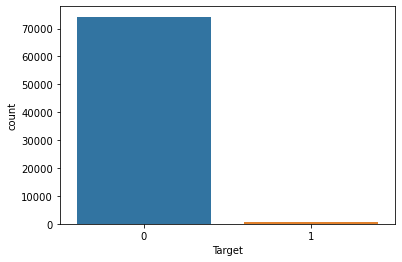

In [11]:
sns.countplot(x = 'Target', data = data_master)

In [12]:
print('Unpaid credit ratio is ', round((data_master.Target.value_counts(dropna = False)[1] / len(data_master)) * 100, 2) ,'%')

Unpaid credit ratio is  1.0 %


#### 2.1) Null Check <a class="anchor" id="section_2_1"></a>

In [13]:
### It is consist of string, int and float columns. 
### There exist missing record in some columns (ex : upfront_price)
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Target                                            75000 non-null  int64  
 1   Restructured Credit Request YN                    74520 non-null  object 
 2   Customer GBF                                      73040 non-null  object 
 3   CC_LO_MO_OD_L6M                                   74537 non-null  float64
 4   KKB Bureau Score                                  74497 non-null  float64
 5   CC Total Payment of all Credit cards              74497 non-null  float64
 6   CC_LO_OD_L1M                                      74537 non-null  float64
 7   Employers Address YN                              74520 non-null  object 
 8   Branch and work adresses are the same             75000 non-null  object 
 9   Main and applicat

All null values are in yellow


Text(0.5, 1.0, 'Null Value Check')

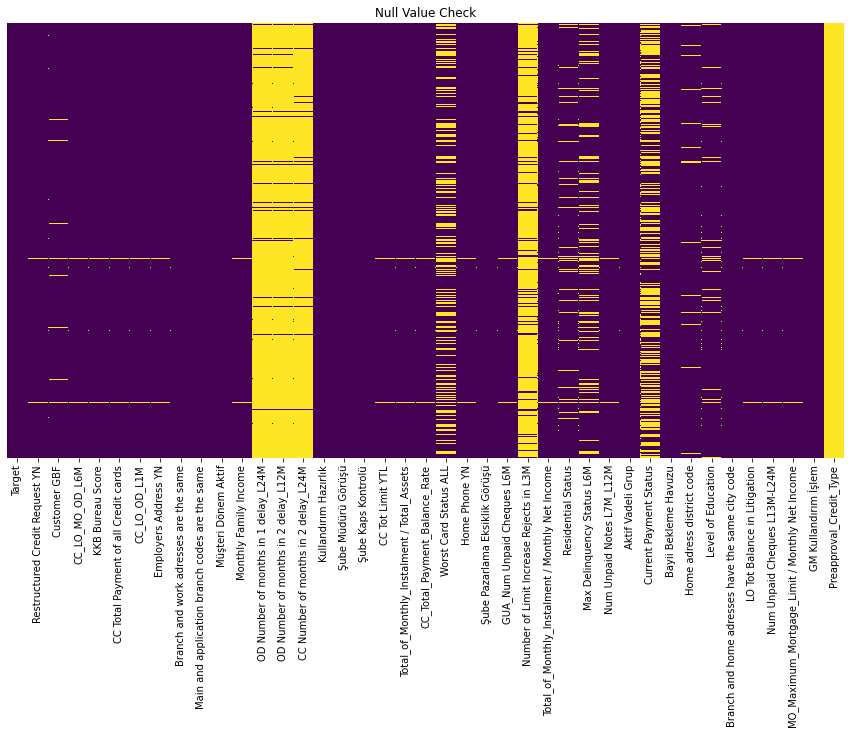

In [14]:
print('All null values are in yellow')
### Preapproval_Credit_Type is totally empty, it can be dropped from dataframe
### sequential horizontal yellow lines show that missing data in sequential columns, these record are analysed as below
plt.figure(figsize=(15,8))
sns.heatmap(data=data_master.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.title('Null Value Check')

In [15]:
data_master[(data_master['Restructured Credit Request YN'].isnull()) & 
            (data_master['Customer GBF'].isnull()) & 
            (data_master['CC_LO_MO_OD_L6M'].isnull()) & (data_master['KKB Bureau Score'].isnull())].head()

,Target,Restructured Credit Request YN,Customer GBF,CC_LO_MO_OD_L6M,KKB Bureau Score,CC Total Payment of all Credit cards,CC_LO_OD_L1M,Employers Address YN,Branch and work adresses are the same,Main and application branch codes are the same,Müşteri Dönem Aktif,Monthly Family Income,OD Number of months in 1 delay_L24M,OD Number of months in 2 delay_L12M,CC Number of months in 2 delay_L24M,Kullandırım Hazırlık,Şube Müdürü Görüşü,Şube Kaps Kontrolü,CC Tot Limit YTL,Total_of_Monthly_Instalment / Total_Assets,CC_Total_Payment_Balance_Rate,Worst Card Status ALL,Home Phone YN,Şube Pazarlama Eksiklik Görüşü,GUA_Num Unpaid Cheques L6M,Number of Limit Increase Rejects in L3M,Total_of_Monthly_Instalment / Monthly Net Income,Residential Status,Max Delinquency Status L6M,Num Unpaid Notes L7M_L12M,Aktif Vadeli Grup,Current Payment Status,Bayii Bekleme Havuzu,Home adress district code,Level of Education,Branch and home adresses have the same city code,LO Tot Balance in Litigation,Num Unpaid Cheques L13M-L24M,MO_Maximum_Mortgage_Limit / Monthly Net Income,GM Kullandırım İşlem,Preapproval_Credit_Type
15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,N,NaN,NaN,NaN,0,NaN
109,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10.00,NaN,N,NaN,NaN,NaN,0,NaN
616,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10.00,NaN,N,NaN,NaN,NaN,0,NaN
793,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1.00,NaN,N,NaN,NaN,NaN,0,NaN
993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10.00,NaN,N,NaN,NaN,NaN,0,NaN


In [16]:
data_master[(data_master['Restructured Credit Request YN'].isnull()) & 
            (data_master['Customer GBF'].isnull()) & 
            (data_master['CC_LO_MO_OD_L6M'].isnull()) & (data_master['KKB Bureau Score'].isnull())].shape

(463, 41)

In [17]:
### These values can be dropped from df because most of them are empty for these values
### There may be systematic error that needs to be addressed with these so that data  sources should be checked 

data_master[(data_master['Restructured Credit Request YN'].isnull()) & 
            (data_master['Customer GBF'].isnull()) & 
            (data_master['CC_LO_MO_OD_L6M'].isnull()) & (data_master['KKB Bureau Score'].isnull())].Target.value_counts(dropna=False)

0    445
1     18
Name: Target, dtype: int64

In [18]:
data_master.isnull().sum().sort_values(ascending = False)

Preapproval_Credit_Type                             74993
OD Number of months in 2 delay_L12M                 72917
OD Number of months in 1 delay_L24M                 72917
CC Number of months in 2 delay_L24M                 72597
Number of Limit Increase Rejects in L3M             65385
Current Payment Status                              36109
Worst Card Status ALL                               26044
Max Delinquency Status L6M                          15977
Residential Status                                   5570
Level of Education                                   4251
Customer GBF                                         1960
Home adress district code                            1366
CC Total Payment of all Credit cards                  503
KKB Bureau Score                                      503
CC Tot Limit YTL                                      503
Home Phone YN                                         496
Monthly Family Income                                 496
MO_Maximum_Mor

#### 2.2) Data Description <a class="anchor" id="section_2_2"></a>

In [19]:
### there is outliers in CC Total Payment of all Credit cards, CC_LO_OD_L1M, Monthly Family Income,
### Monthly_Family_Income max value should be checked
### outlier analysis is required for numerical columns
data_master.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,75000.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
CC_LO_MO_OD_L6M,74537.00,3.07,3.71,0.00,1.00,2.00,4.00,112.00
KKB Bureau Score,74497.00,1233.86,341.67,0.00,1094.00,1268.00,1432.00,1900.00
CC Total Payment of all Credit cards,74497.00,1475.15,4486.81,0.00,7.00,500.00,1450.00,404590.00
CC_LO_OD_L1M,74537.00,0.85,1.25,0.00,0.00,0.00,1.00,39.00
Müşteri Dönem Aktif,75000.00,0.71,0.45,0.00,0.00,1.00,1.00,1.00
Monthly Family Income,74504.00,21601.55,4727667.58,0.00,1621.00,2500.00,4180.00,1290438565.00
OD Number of months in 1 delay_L24M,2083.00,1.77,3.83,0.00,0.00,0.00,2.00,34.00
OD Number of months in 2 delay_L12M,2083.00,0.15,0.64,0.00,0.00,0.00,0.00,15.00
CC Number of months in 2 delay_L24M,2403.00,0.71,1.79,0.00,0.00,0.00,0.00,26.00


In [20]:
### averages for numerical columns are generally high for target = 1 
data_master[data_master["Target"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Target,750.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
CC_LO_MO_OD_L6M,732.00,4.46,4.36,0.00,2.00,3.00,6.00,42.00
KKB Bureau Score,732.00,964.23,500.85,0.00,670.75,1096.00,1319.00,1900.00
CC Total Payment of all Credit cards,732.00,3062.87,11313.96,0.00,0.00,407.50,2040.50,204737.00
CC_LO_OD_L1M,732.00,1.39,1.71,0.00,0.00,1.00,2.00,12.00
Müşteri Dönem Aktif,750.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Monthly Family Income,732.00,5451.04,15844.92,0.00,1700.00,2500.00,4000.00,300000.00
OD Number of months in 1 delay_L24M,69.00,4.49,5.12,0.00,0.00,2.00,7.00,17.00
OD Number of months in 2 delay_L12M,69.00,0.59,1.10,0.00,0.00,0.00,1.00,5.00
CC Number of months in 2 delay_L24M,67.00,2.70,2.75,0.00,0.00,2.00,4.00,11.00


In [21]:
data_master[data_master["Target"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Target,74250.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CC_LO_MO_OD_L6M,73805.00,3.06,3.70,0.00,1.00,2.00,4.00,112.00
KKB Bureau Score,73765.00,1236.54,338.64,0.00,1096.00,1270.00,1432.00,1900.00
CC Total Payment of all Credit cards,73765.00,1459.39,4363.20,0.00,8.00,500.00,1446.00,404590.00
CC_LO_OD_L1M,73805.00,0.84,1.24,0.00,0.00,0.00,1.00,39.00
Müşteri Dönem Aktif,74250.00,0.71,0.45,0.00,0.00,1.00,1.00,1.00
Monthly Family Income,73772.00,21761.80,4751064.52,0.00,1618.00,2500.00,4200.00,1290438565.00
OD Number of months in 1 delay_L24M,2014.00,1.67,3.74,0.00,0.00,0.00,1.00,34.00
OD Number of months in 2 delay_L12M,2014.00,0.13,0.61,0.00,0.00,0.00,0.00,15.00
CC Number of months in 2 delay_L24M,2336.00,0.65,1.73,0.00,0.00,0.00,0.00,26.00


#### 2.3) Handle Missing Values <a class="anchor" id="section_2_3"></a>

In [22]:
possible_cat = [col for col in data_master.columns
                 if data_master.dtypes[f"{col}"] == np.object]
possible_num = list(data_master.select_dtypes([np.number]).columns)

In [23]:
for col in possible_num:
    data_master[col].fillna(0, inplace=True)

All null values are in yellow


Text(0.5, 1.0, 'Null Value Check')

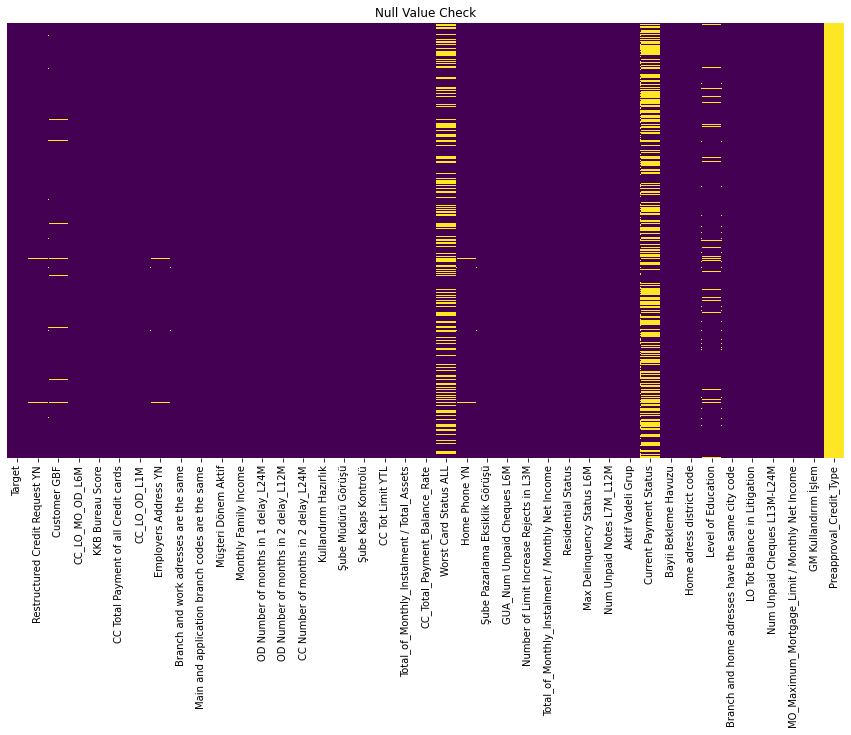

In [24]:
print('All null values are in yellow')
plt.figure(figsize=(15,8))
sns.heatmap(data=data_master.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.title('Null Value Check')

In [25]:
for col in possible_cat:
    #data_master[col].fillna('Unknown', inplace=True)
    data_master[col] = data_master[col].astype(str)

#### 2.4) Analysis for Numerical Columns <a class="anchor" id="section_2_4"></a>

##### 2.4.1) Distribution Plot for Numerical Columns <a class="anchor" id="section_2_4_1"></a>

CC_LO_MO_OD_L6M


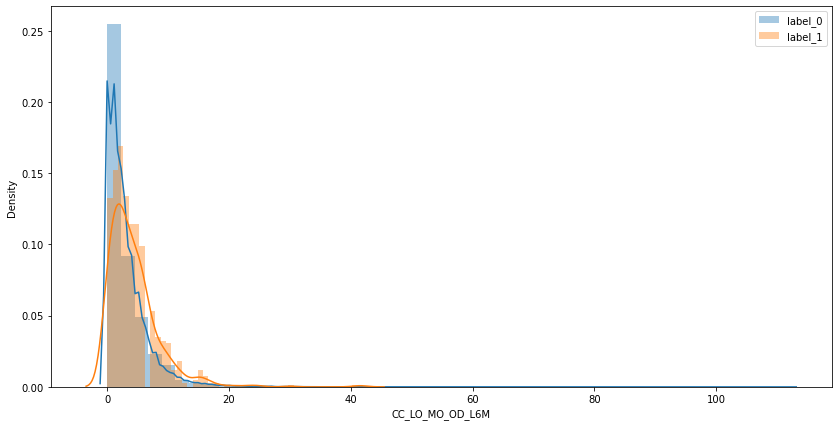

KKB Bureau Score


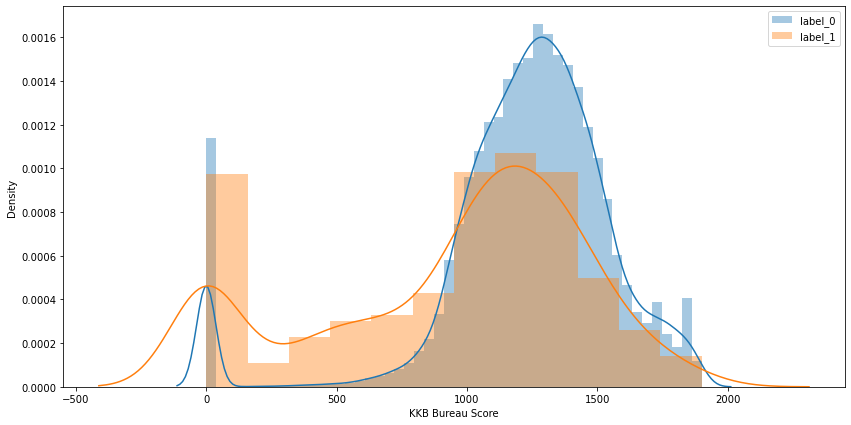

CC Total Payment of all Credit cards


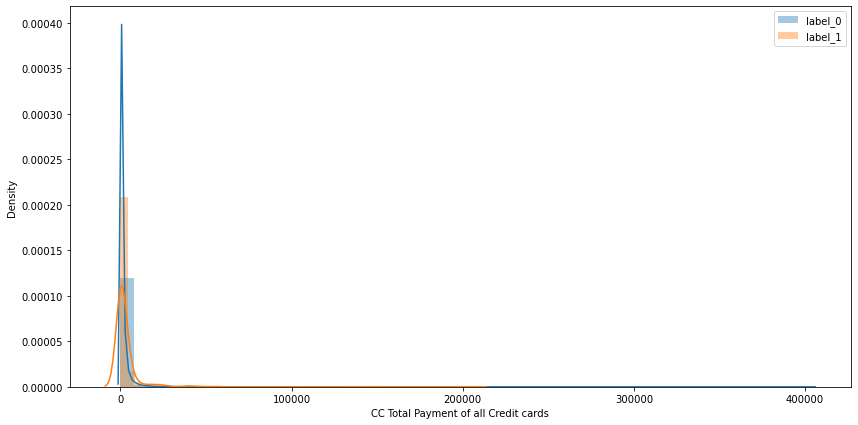

CC_LO_OD_L1M


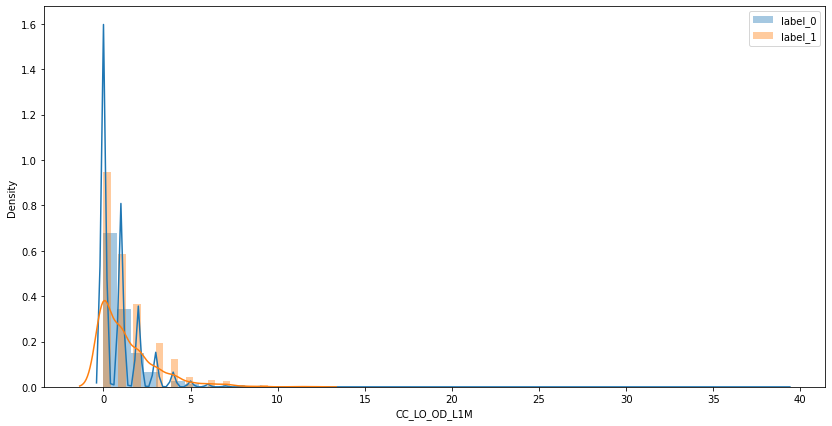

Müşteri Dönem Aktif


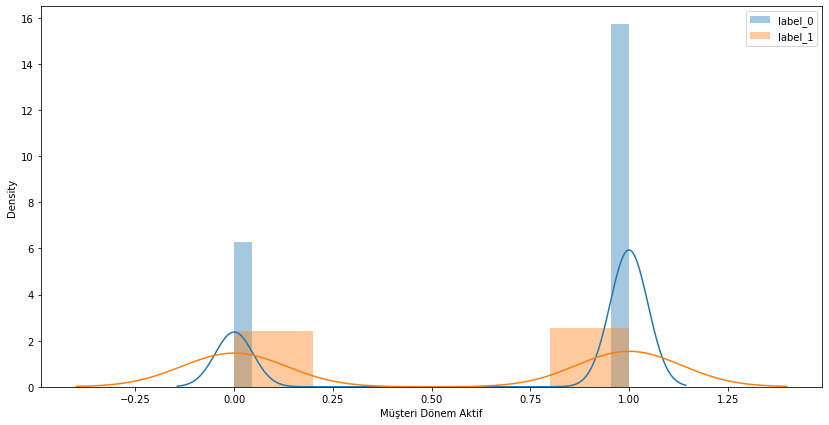

Monthly Family Income


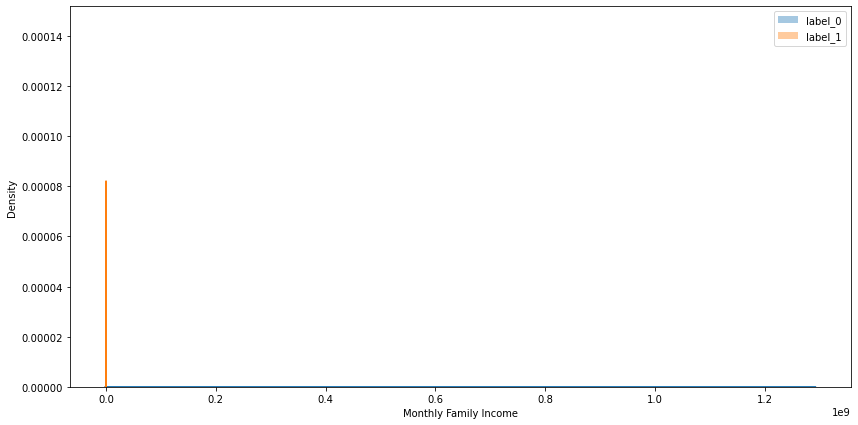

OD Number of months in 1 delay_L24M


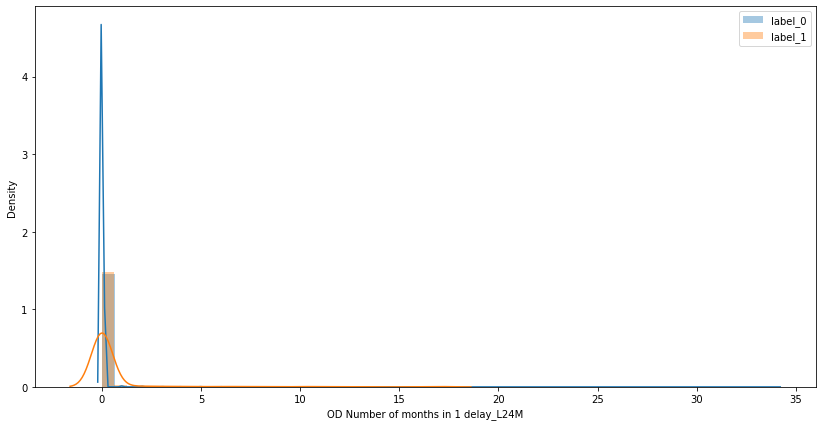

OD Number of months in 2 delay_L12M


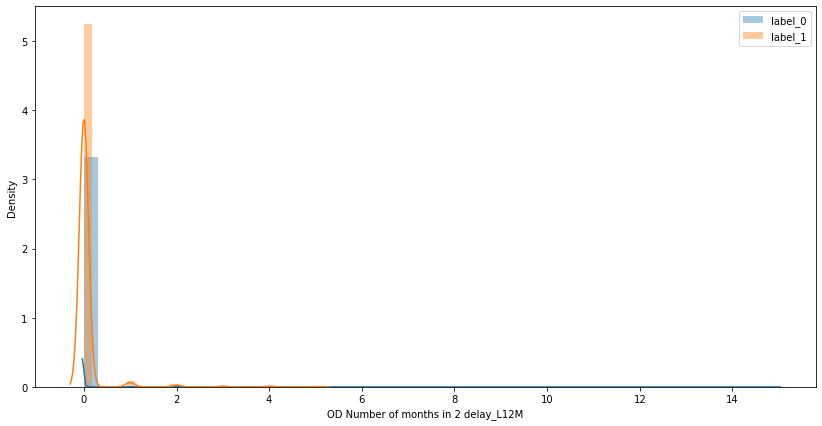

CC Number of months in 2 delay_L24M


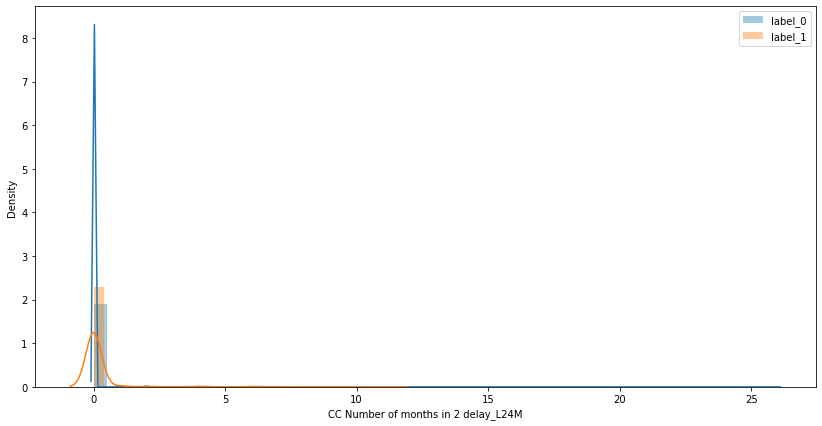

Kullandırım Hazırlık


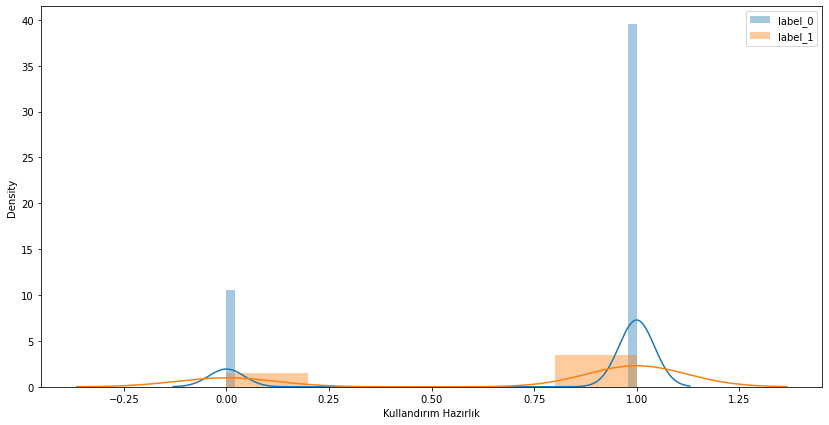

Şube Müdürü Görüşü


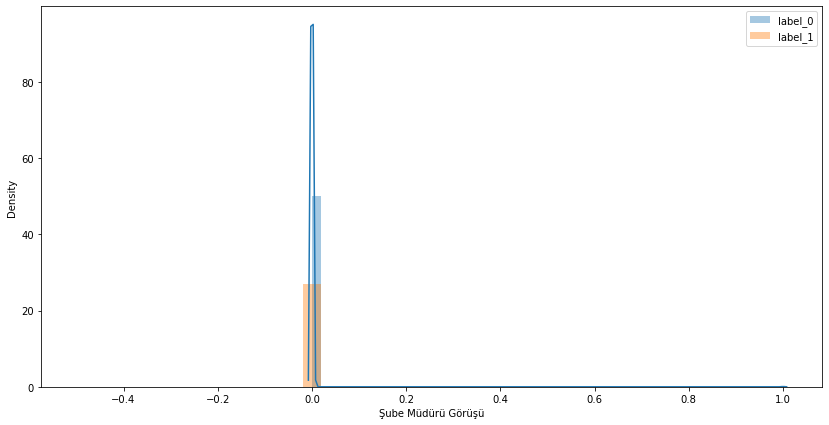

Şube Kaps Kontrolü


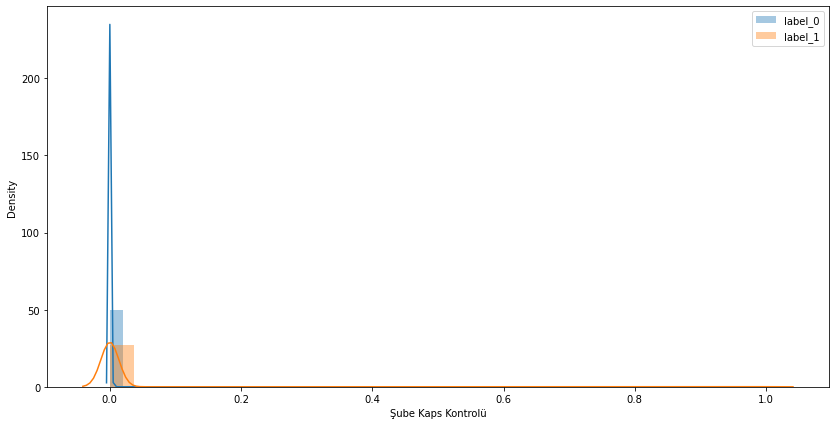

CC Tot Limit YTL


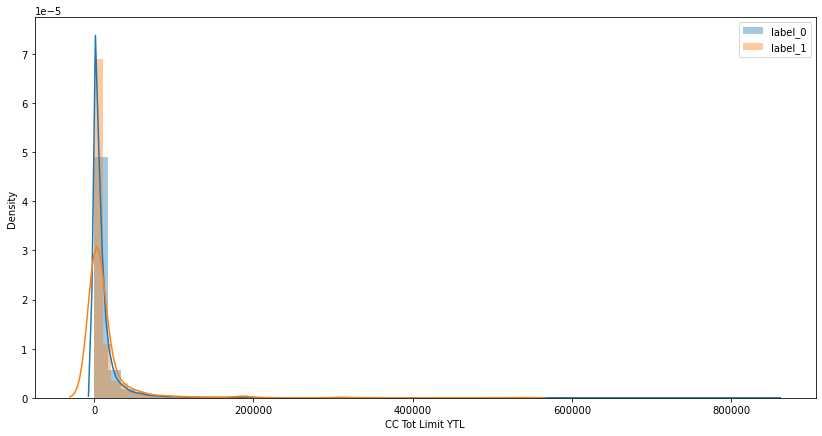

Total_of_Monthly_Instalment / Total_Assets


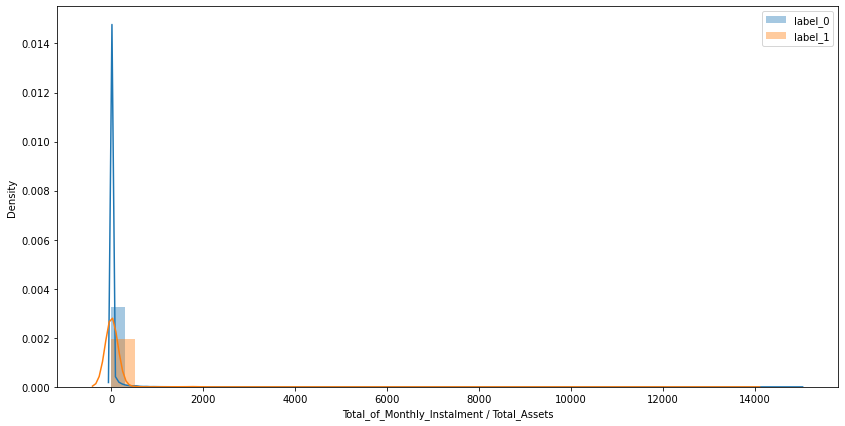

CC_Total_Payment_Balance_Rate


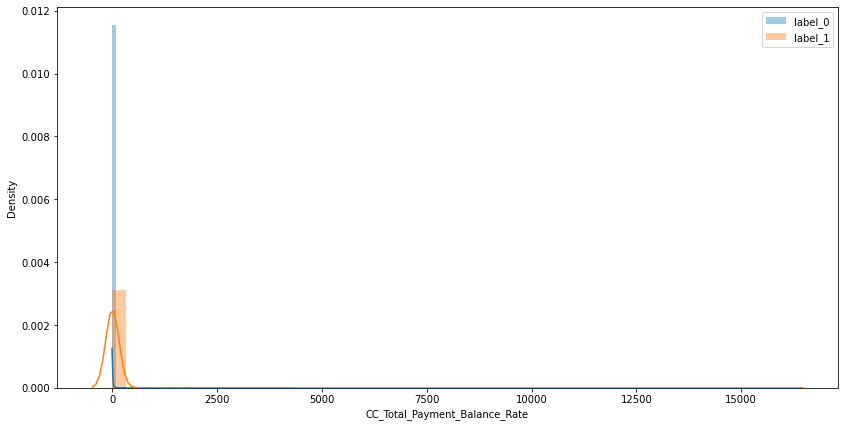

Şube Pazarlama Eksiklik Görüşü


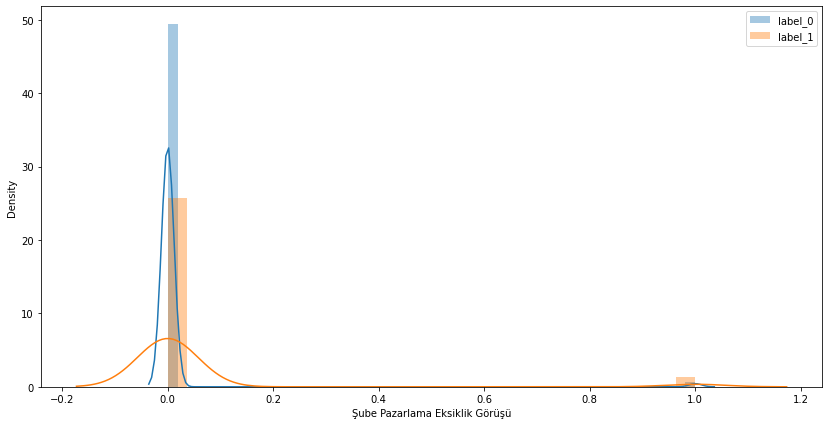

GUA_Num Unpaid Cheques L6M


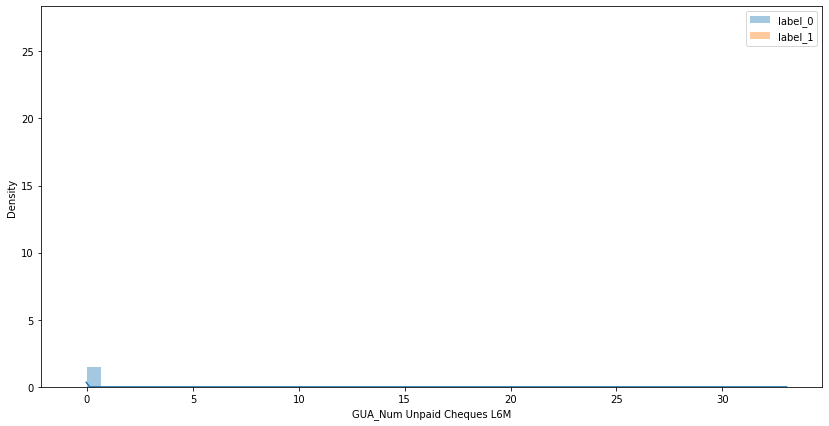

Number of Limit Increase Rejects in L3M


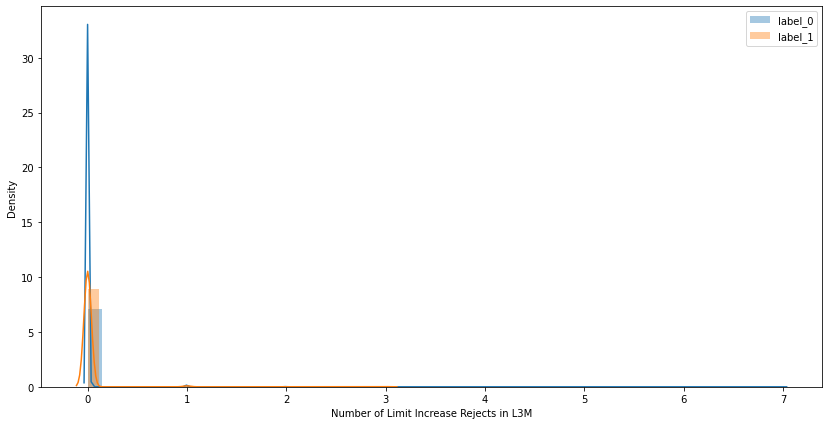

Total_of_Monthly_Instalment / Monthly Net Income


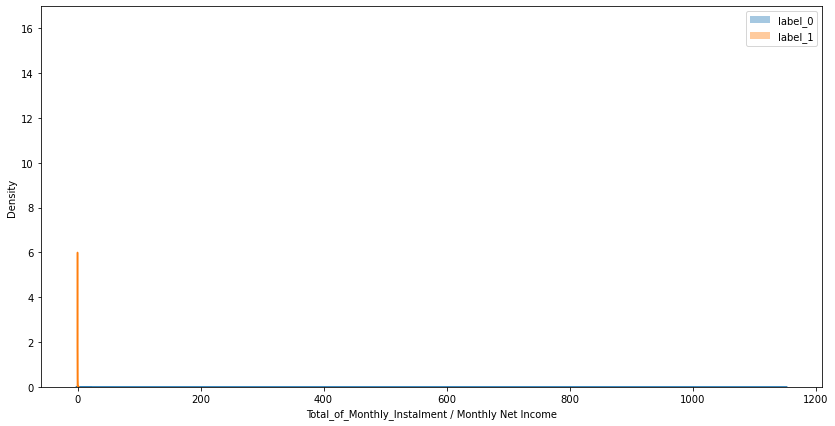

Residential Status


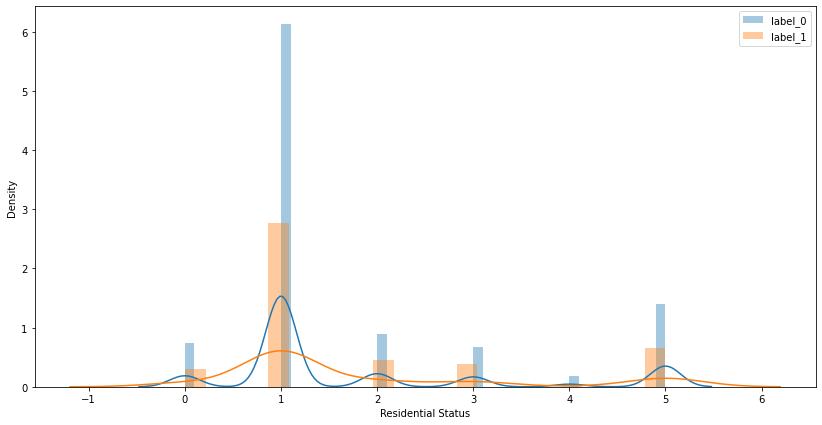

Max Delinquency Status L6M


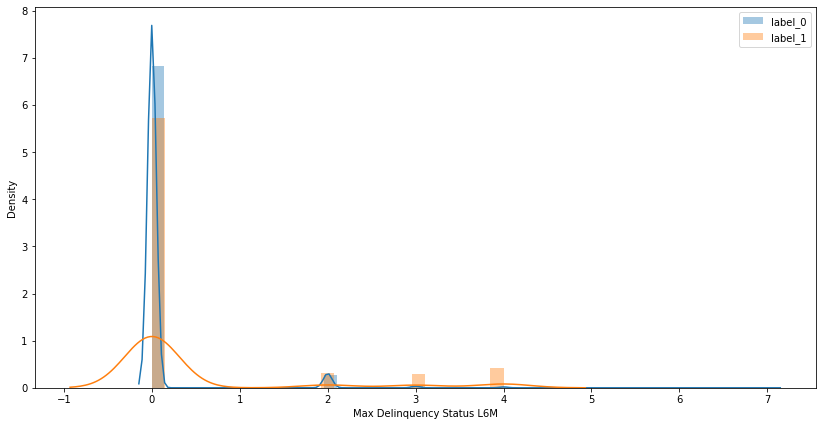

Num Unpaid Notes L7M_L12M


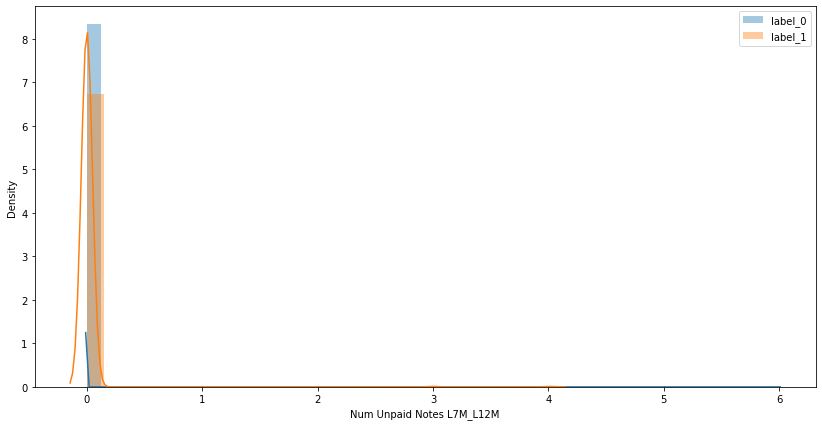

Aktif Vadeli Grup


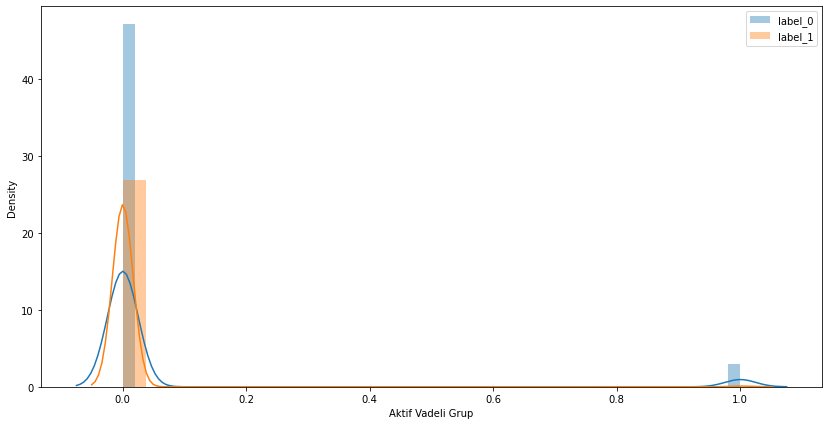

Bayii Bekleme Havuzu


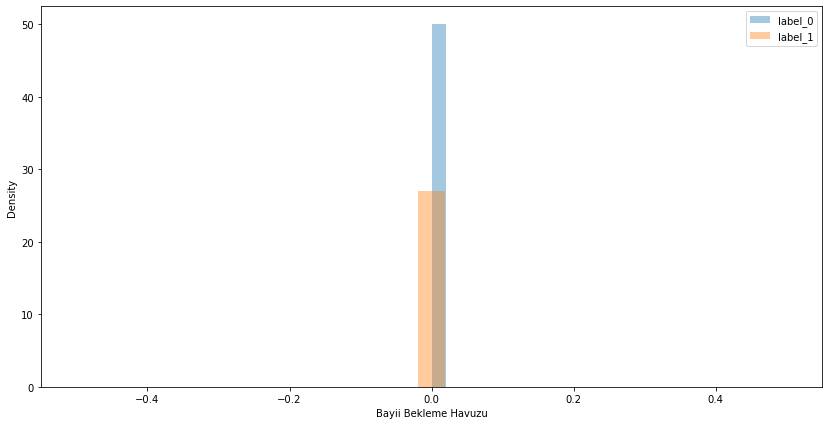

Home adress district code


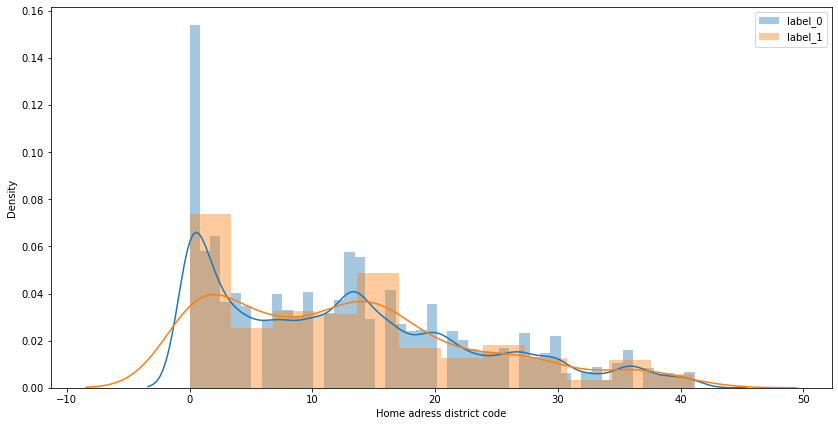

LO Tot Balance in Litigation


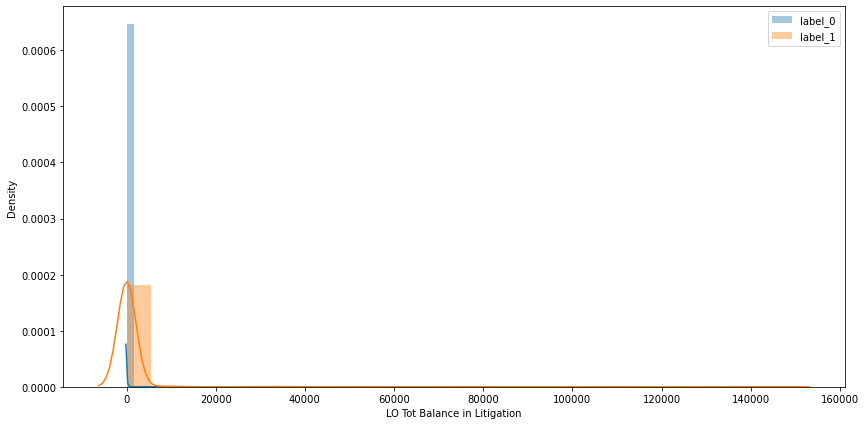

Num Unpaid Cheques L13M-L24M


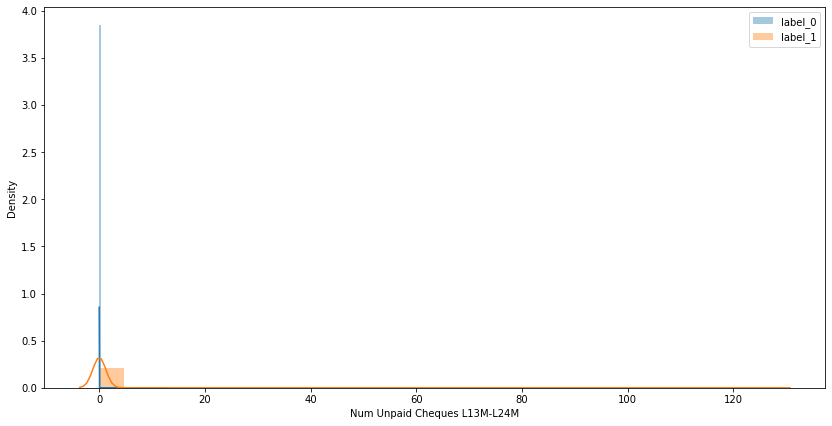

MO_Maximum_Mortgage_Limit / Monthly Net Income


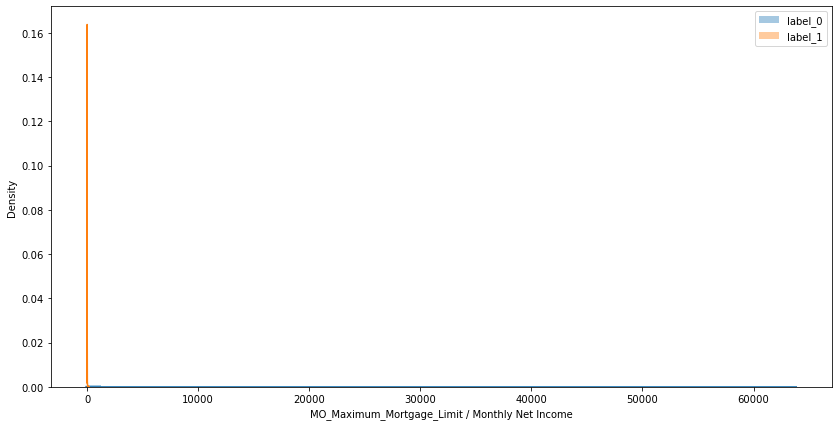

GM Kullandırım İşlem


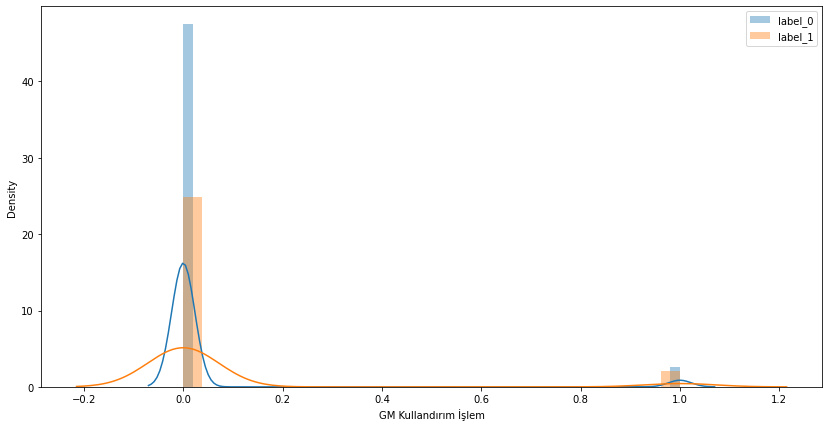

In [26]:
### our data does not seem to be centered around any value.
### the data distribution is positively-skewed (or right-skewed) except for KKB Bureau Score
### transformation can be applied
for feature in possible_num[1:]:
    print(feature)
    plt.figure(figsize=(14,7))
    sns.distplot(data_master[data_master["Target"] == 0][feature], kde = True, label='label_0')
    sns.distplot(data_master[data_master["Target"] == 1][feature], kde = True, label='label_1')
    plt.legend()
    plt.show()

##### 2.4.2) Normality Test for Numerical Columns <a class="anchor" id="section_2_4_2"></a>

###### 2.4.2.1) Shapiro-Wilk Test <a class="anchor" id="section_2_4_2_1"></a>

In [27]:
for feature in possible_num[1:]:
    test_result = stats.shapiro(data_master[feature])
    print('Shapiro-Wilk test for ' + feature + ' is equal to '+ str(test_result.pvalue))

Shapiro-Wilk test for CC_LO_MO_OD_L6M is equal to 0.0
Shapiro-Wilk test for KKB Bureau Score is equal to 0.0
Shapiro-Wilk test for CC Total Payment of all Credit cards is equal to 0.0
Shapiro-Wilk test for CC_LO_OD_L1M is equal to 0.0
Shapiro-Wilk test for Müşteri Dönem Aktif is equal to 0.0
Shapiro-Wilk test for Monthly Family Income is equal to 0.0
Shapiro-Wilk test for OD Number of months in 1 delay_L24M is equal to 0.0
Shapiro-Wilk test for OD Number of months in 2 delay_L12M is equal to 0.0
Shapiro-Wilk test for CC Number of months in 2 delay_L24M is equal to 0.0
Shapiro-Wilk test for Kullandırım Hazırlık is equal to 0.0
Shapiro-Wilk test for Şube Müdürü Görüşü is equal to 0.0
Shapiro-Wilk test for Şube Kaps Kontrolü is equal to 0.0
Shapiro-Wilk test for CC Tot Limit YTL is equal to 0.0
Shapiro-Wilk test for Total_of_Monthly_Instalment / Total_Assets is equal to 0.0
Shapiro-Wilk test for CC_Total_Payment_Balance_Rate is equal to 0.0
Shapiro-Wilk test for Şube Pazarlama Eksiklik Gö

##### 2.4.2.2) Anderson Test <a class="anchor" id="section_2_4_2_2"></a>

In [28]:
for feature in possible_num[1:]:
    test_result = stats.anderson(data_master[feature], dist = 'norm' )
    print('Anderson test for ' + feature + ' is equal to '+ str(test_result))

Anderson test for CC_LO_MO_OD_L6M is equal to AndersonResult(statistic=4505.544089401097, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test for KKB Bureau Score is equal to AndersonResult(statistic=2366.5001152031327, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test for CC Total Payment of all Credit cards is equal to AndersonResult(statistic=14466.121191652579, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test for CC_LO_OD_L1M is equal to AndersonResult(statistic=7170.633325562128, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test for Müşteri Dönem Aktif is equal to AndersonResult(statistic=16734.431975345185, critical_values=array([0.576, 0.656, 0.787, 0.918, 1

##### 2.4.3) Normality Test Results for Numerical Columns <a class="anchor" id="section_2_4_3"></a>

Shapiro-Wilk test for normality is available when using the Distribution platform to examine a continuous variable. The null hypothesis for this test is that the data are normally distributed. ... 
If the p-value is greater than 0.05, then the null hypothesis is not rejected.

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. Null hypothesis can be rejected if the returned statistic şs larger than critical values.

After analysing the results of parametric  Shapiro and nonparametric Anderson-Darling, the numerical column was not distributed normally. There exist right skewness in the data. Transformations can be applied.

After closely analyzing data, the number of ones is decreasing for higher KKB Bureau Score values.  Record which has KKB Bureau Score of bigger than 1500 constitute the highest portion of data but the number of ones are very few for these record.
  

##### In case of tree based algorithms, there is no need to apply transformations to data  because these algorithms are very robust to outliers and skewed distributions in feature columns.

##### 2.4.4) Outlier Detection for Numerical Columns<a class="anchor" id="section_2_4_4"></a>

For the numerical columns, data that is outside of interquartile range will be treated as outliers and then will be dropped.  IQR range is used as 1.5 which is equal to 2.7σ  from mean

In [29]:
def func_outlier_plots(df, column_name):
    print('-'*120)
    print(column_name)
    print('-'*120)
    df_values = df[column_name].values 
    q25, q75 = np.percentile(df_values, 25), np.percentile(df_values, 75)
    range_iqr = q75 - q25
    data_iqr_cut_off = range_iqr * 1.5
    lower, upper = q25 - data_iqr_cut_off, q75 + data_iqr_cut_off
    print('IQR range: {}'.format(range_iqr) + ' Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    print('Lower: {}'.format(lower) + ' Upper: {}'.format(upper))
    
    outliers = [x for x in df_values if x < lower or x > upper]
    
    print('Number of outliers: {}'.format(len(outliers)))
    print('-'*50)
    print('df without outlier ratios')
    print(df[(df[column_name] < upper) & (df[column_name] > lower)].Target.value_counts())
    print('-'*50)
    print('outlier ratios')
    print(df[~(df[column_name] < upper) | ~(df[column_name] > lower)].Target.value_counts())
    print('-'*50)
    df_no_outliers = df.drop(df[(df[column_name] > upper) | (df[column_name] < lower)].index)
    print('df without outlier hist')
    df_no_outliers[column_name].hist()
    plt.show()
    print('-'*50)
    print('df without outlier box plot')
    sns.boxplot(x="Target", y=column_name, data=df_no_outliers)
    plt.show()

------------------------------------------------------------------------------------------------------------------------
CC_LO_MO_OD_L6M
------------------------------------------------------------------------------------------------------------------------
IQR range: 3.0 Quartile 25: 1.0 | Quartile 75: 4.0
Lower: -3.5 Upper: 8.5
Number of outliers: 4785
--------------------------------------------------
df without outlier ratios
0    69556
1      659
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    4694
1      91
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


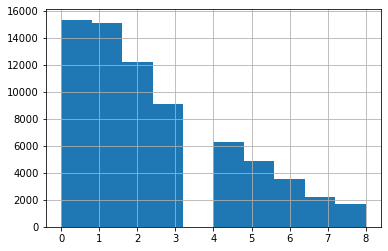

--------------------------------------------------
df without outlier box plot


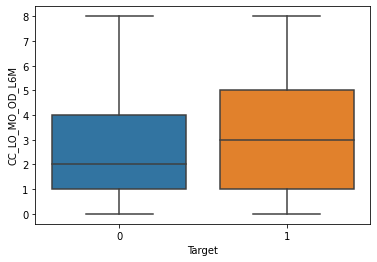

------------------------------------------------------------------------------------------------------------------------
KKB Bureau Score
------------------------------------------------------------------------------------------------------------------------
IQR range: 341.0 Quartile 25: 1090.0 | Quartile 75: 1431.0
Lower: 578.5 Upper: 1942.5
Number of outliers: 3669
--------------------------------------------------
df without outlier ratios
0    70768
1      563
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    3482
1     187
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


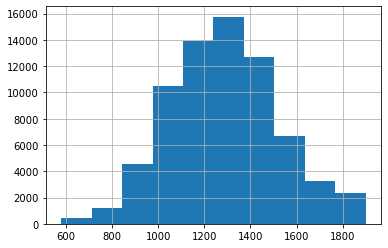

--------------------------------------------------
df without outlier box plot


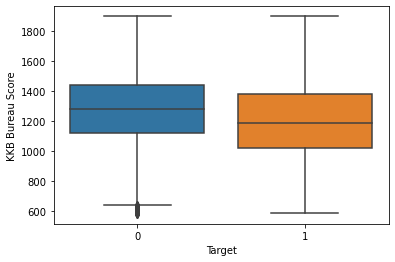

------------------------------------------------------------------------------------------------------------------------
CC Total Payment of all Credit cards
------------------------------------------------------------------------------------------------------------------------
IQR range: 1435.0 Quartile 25: 2.0 | Quartile 75: 1437.0
Lower: -2150.5 Upper: 3589.5
Number of outliers: 6620
--------------------------------------------------
df without outlier ratios
0    67748
1      632
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    6502
1     118
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


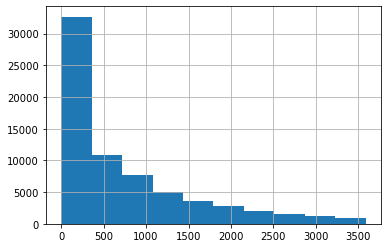

--------------------------------------------------
df without outlier box plot


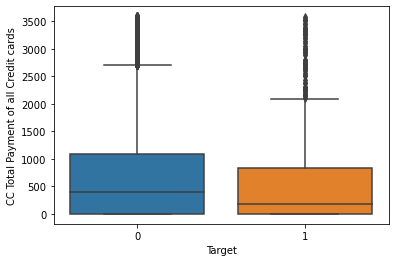

------------------------------------------------------------------------------------------------------------------------
CC_LO_OD_L1M
------------------------------------------------------------------------------------------------------------------------
IQR range: 1.0 Quartile 25: 0.0 | Quartile 75: 1.0
Lower: -1.5 Upper: 2.5
Number of outliers: 6682
--------------------------------------------------
df without outlier ratios
0    67708
1      610
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    6542
1     140
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


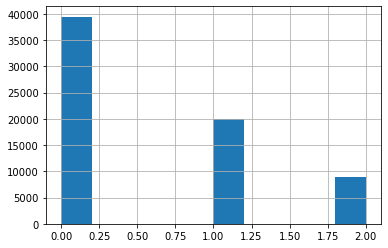

--------------------------------------------------
df without outlier box plot


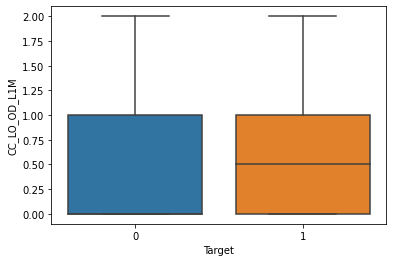

------------------------------------------------------------------------------------------------------------------------
Müşteri Dönem Aktif
------------------------------------------------------------------------------------------------------------------------
IQR range: 1.0 Quartile 25: 0.0 | Quartile 75: 1.0
Lower: -1.5 Upper: 2.5
Number of outliers: 0
--------------------------------------------------
df without outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
df without outlier hist


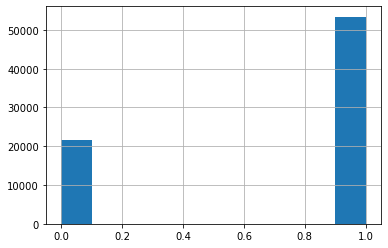

--------------------------------------------------
df without outlier box plot


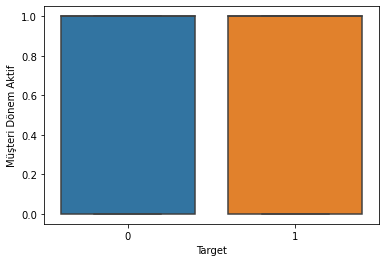

------------------------------------------------------------------------------------------------------------------------
Monthly Family Income
------------------------------------------------------------------------------------------------------------------------
IQR range: 2497.0 Quartile 25: 1603.0 | Quartile 75: 4100.0
Lower: -2142.5 Upper: 7845.5
Number of outliers: 6602
--------------------------------------------------
df without outlier ratios
0    67723
1      675
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    6527
1      75
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


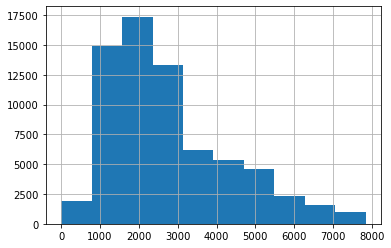

--------------------------------------------------
df without outlier box plot


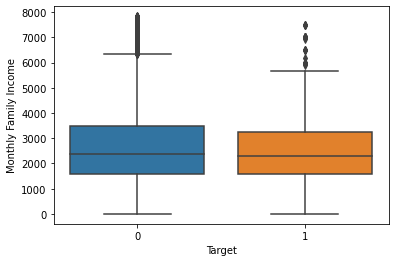

------------------------------------------------------------------------------------------------------------------------
OD Number of months in 1 delay_L24M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 712
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


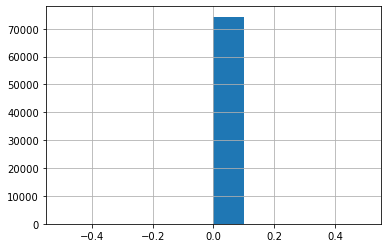

--------------------------------------------------
df without outlier box plot


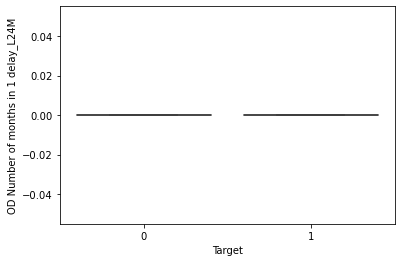

------------------------------------------------------------------------------------------------------------------------
OD Number of months in 2 delay_L12M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 183
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


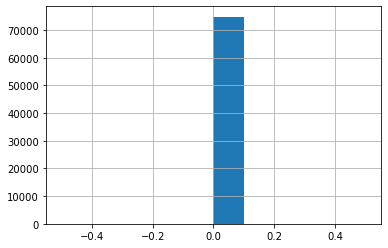

--------------------------------------------------
df without outlier box plot


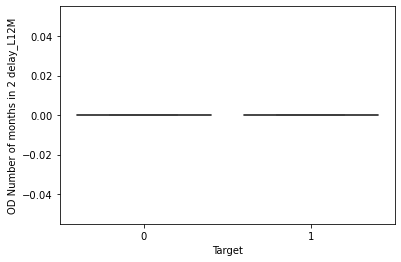

------------------------------------------------------------------------------------------------------------------------
CC Number of months in 2 delay_L24M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 578
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


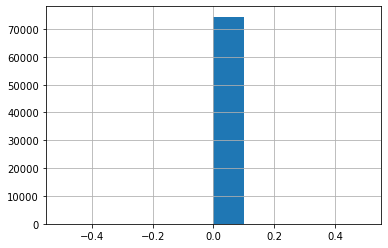

--------------------------------------------------
df without outlier box plot


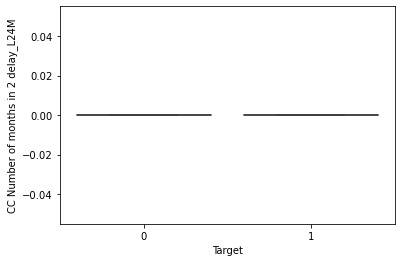

------------------------------------------------------------------------------------------------------------------------
Kullandırım Hazırlık
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 1.0 | Quartile 75: 1.0
Lower: 1.0 Upper: 1.0
Number of outliers: 15820
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


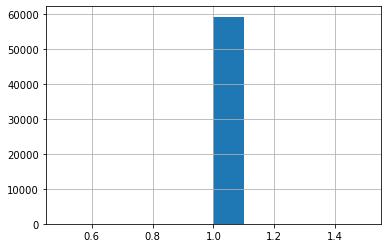

--------------------------------------------------
df without outlier box plot


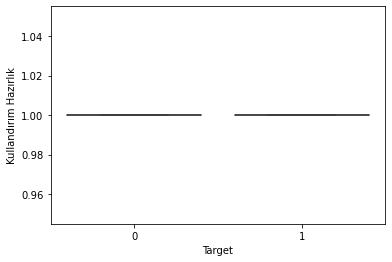

------------------------------------------------------------------------------------------------------------------------
Şube Müdürü Görüşü
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 43
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


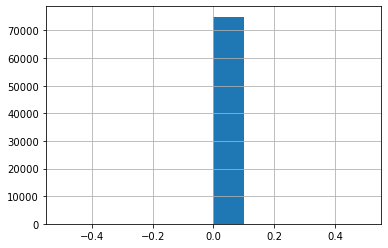

--------------------------------------------------
df without outlier box plot


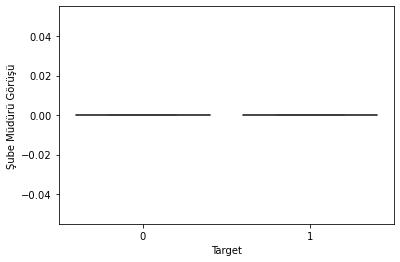

------------------------------------------------------------------------------------------------------------------------
Şube Kaps Kontrolü
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 21
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


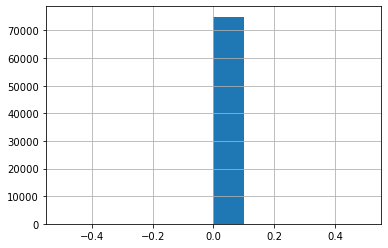

--------------------------------------------------
df without outlier box plot


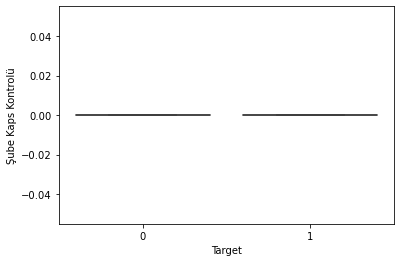

------------------------------------------------------------------------------------------------------------------------
CC Tot Limit YTL
------------------------------------------------------------------------------------------------------------------------
IQR range: 10400.0 Quartile 25: 1400.0 | Quartile 75: 11800.0
Lower: -14200.0 Upper: 27400.0
Number of outliers: 6685
--------------------------------------------------
df without outlier ratios
0    67640
1      661
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    6610
1      89
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


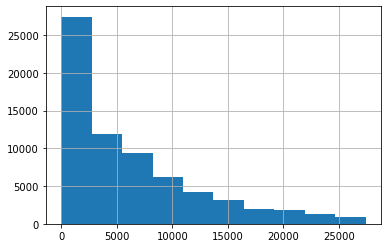

--------------------------------------------------
df without outlier box plot


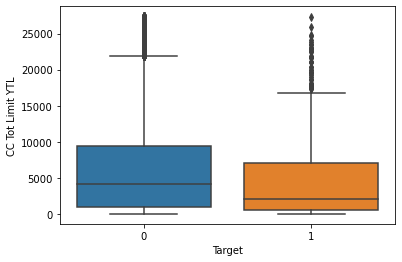

------------------------------------------------------------------------------------------------------------------------
Total_of_Monthly_Instalment / Total_Assets
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 16306
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


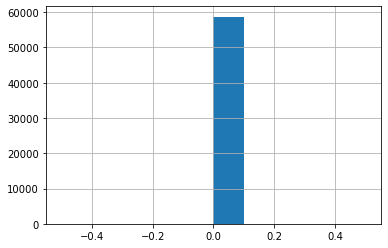

--------------------------------------------------
df without outlier box plot


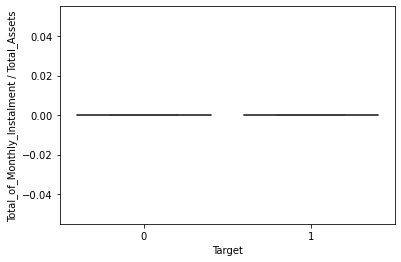

------------------------------------------------------------------------------------------------------------------------
CC_Total_Payment_Balance_Rate
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.41253904399999997 Quartile 25: 0.0 | Quartile 75: 0.41253904399999997
Lower: -0.618808566 Upper: 1.03134761
Number of outliers: 5612
--------------------------------------------------
df without outlier ratios
0    68714
1      674
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    5536
1      76
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


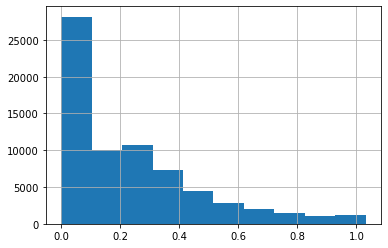

--------------------------------------------------
df without outlier box plot


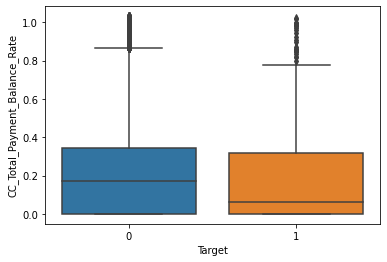

------------------------------------------------------------------------------------------------------------------------
Şube Pazarlama Eksiklik Görüşü
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 994
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


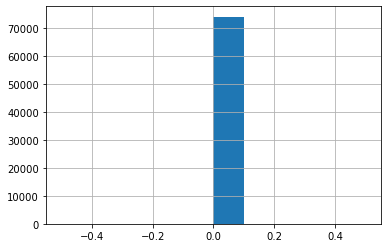

--------------------------------------------------
df without outlier box plot


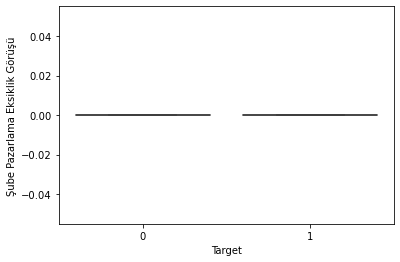

------------------------------------------------------------------------------------------------------------------------
GUA_Num Unpaid Cheques L6M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 2
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


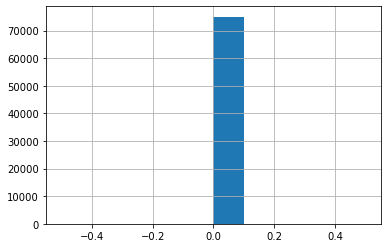

--------------------------------------------------
df without outlier box plot


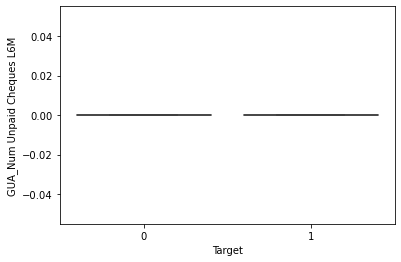

------------------------------------------------------------------------------------------------------------------------
Number of Limit Increase Rejects in L3M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 450
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


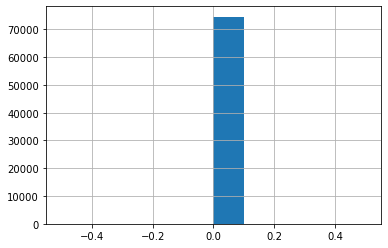

--------------------------------------------------
df without outlier box plot


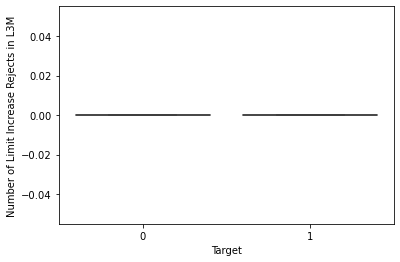

------------------------------------------------------------------------------------------------------------------------
Total_of_Monthly_Instalment / Monthly Net Income
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.1303 Quartile 25: 0.0 | Quartile 75: 0.1303
Lower: -0.19545 Upper: 0.32575
Number of outliers: 6611
--------------------------------------------------
df without outlier ratios
0    67680
1      709
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    6570
1      41
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


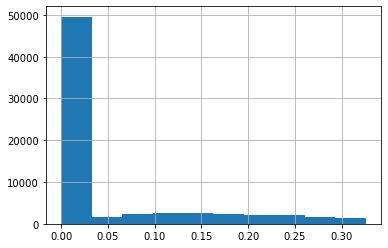

--------------------------------------------------
df without outlier box plot


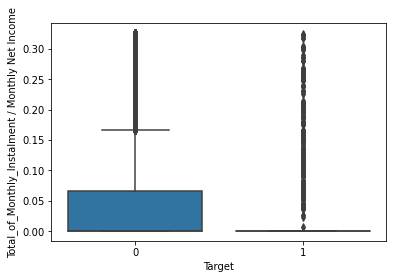

------------------------------------------------------------------------------------------------------------------------
Residential Status
------------------------------------------------------------------------------------------------------------------------
IQR range: 1.0 Quartile 25: 1.0 | Quartile 75: 2.0
Lower: -0.5 Upper: 3.5
Number of outliers: 11834
--------------------------------------------------
df without outlier ratios
0    62530
1      636
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
0    11720
1      114
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


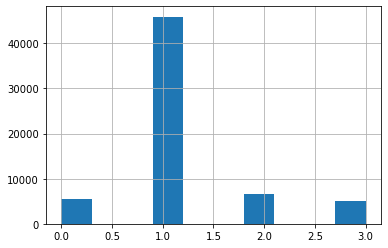

--------------------------------------------------
df without outlier box plot


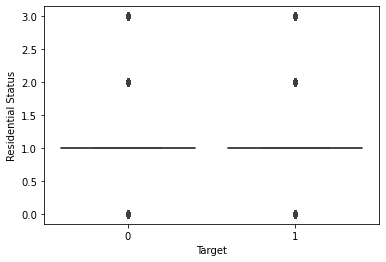

------------------------------------------------------------------------------------------------------------------------
Max Delinquency Status L6M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 3416
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


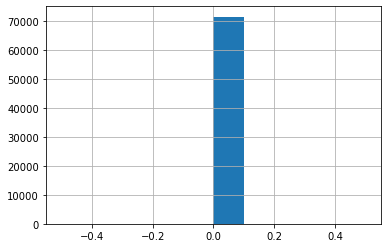

--------------------------------------------------
df without outlier box plot


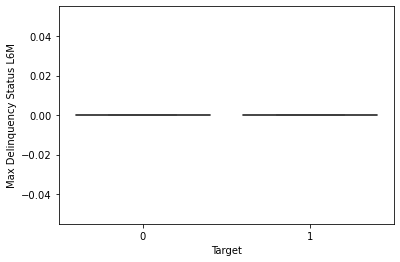

------------------------------------------------------------------------------------------------------------------------
Num Unpaid Notes L7M_L12M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 21
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


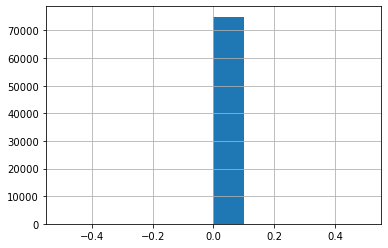

--------------------------------------------------
df without outlier box plot


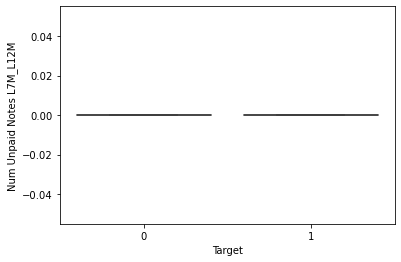

------------------------------------------------------------------------------------------------------------------------
Aktif Vadeli Grup
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 4388
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


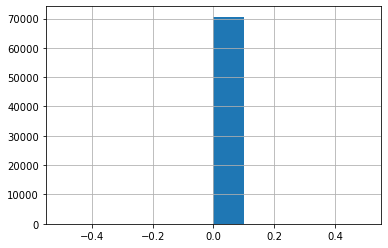

--------------------------------------------------
df without outlier box plot


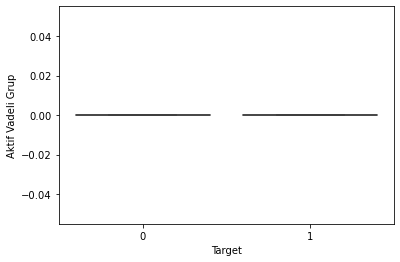

------------------------------------------------------------------------------------------------------------------------
Bayii Bekleme Havuzu
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 0
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


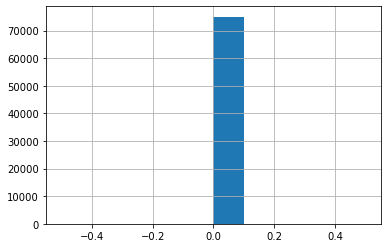

--------------------------------------------------
df without outlier box plot


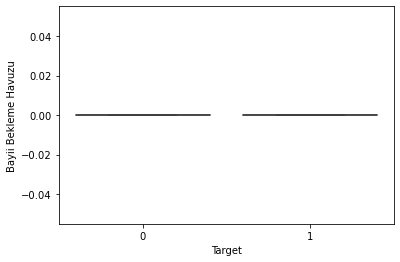

------------------------------------------------------------------------------------------------------------------------
Home adress district code
------------------------------------------------------------------------------------------------------------------------
IQR range: 17.0 Quartile 25: 3.0 | Quartile 75: 20.0
Lower: -22.5 Upper: 45.5
Number of outliers: 0
--------------------------------------------------
df without outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
df without outlier hist


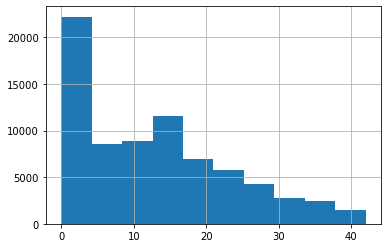

--------------------------------------------------
df without outlier box plot


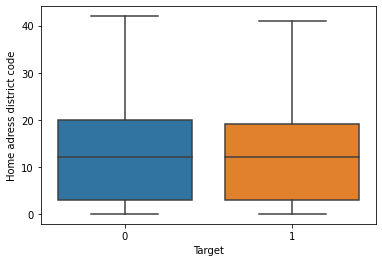

------------------------------------------------------------------------------------------------------------------------
LO Tot Balance in Litigation
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 130
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


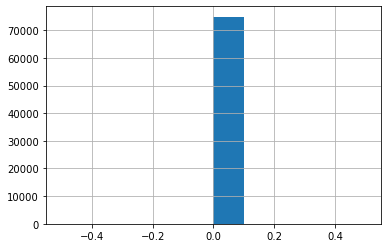

--------------------------------------------------
df without outlier box plot


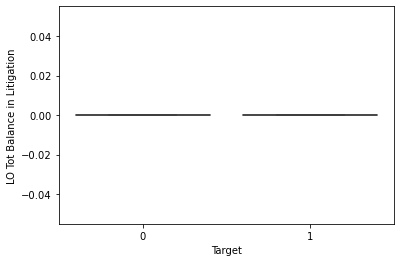

------------------------------------------------------------------------------------------------------------------------
Num Unpaid Cheques L13M-L24M
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 10
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


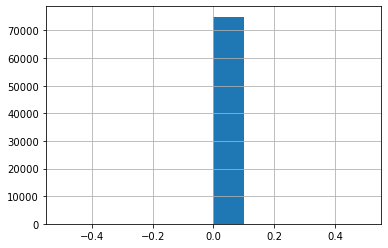

--------------------------------------------------
df without outlier box plot


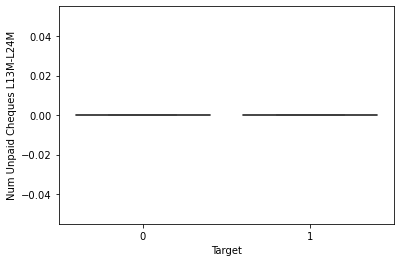

------------------------------------------------------------------------------------------------------------------------
MO_Maximum_Mortgage_Limit / Monthly Net Income
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 8736
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


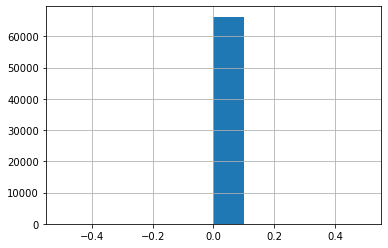

--------------------------------------------------
df without outlier box plot


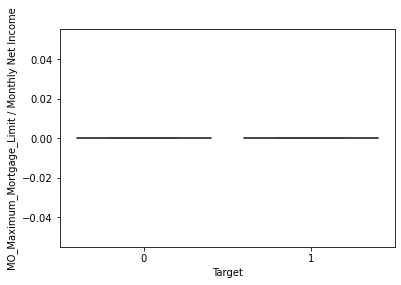

------------------------------------------------------------------------------------------------------------------------
GM Kullandırım İşlem
------------------------------------------------------------------------------------------------------------------------
IQR range: 0.0 Quartile 25: 0.0 | Quartile 75: 0.0
Lower: 0.0 Upper: 0.0
Number of outliers: 3847
--------------------------------------------------
df without outlier ratios
Series([], Name: Target, dtype: int64)
--------------------------------------------------
outlier ratios
0    74250
1      750
Name: Target, dtype: int64
--------------------------------------------------
df without outlier hist


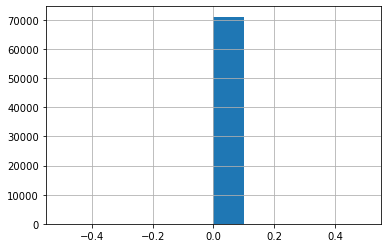

--------------------------------------------------
df without outlier box plot


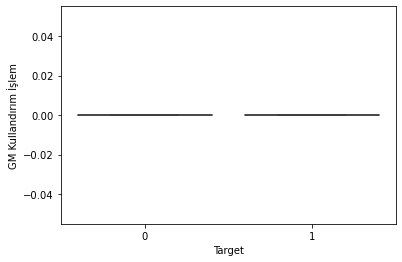

In [30]:
for feature in possible_num[1:]:
    func_outlier_plots(data_master, feature)

It is very clear that both boxplot and histogram become more meaningful after dropping outliers. It should be noted that the problem is actually detection of outliers so that outliers shouldn't be dropped from data. Moreover, if we drop the outliers we will lose so much information. It is also possible to lose less data by lowering these ranges.  



#### 2.5) Analysis for Categorical Columns<a class="anchor" id="section_2_5"></a>

##### 2.5.1) Value Count Check for Categorical Columns<a class="anchor" id="section_2_5_1"></a>

In [31]:
for feature in possible_cat:
    print(data_master[feature].value_counts(normalize=True, dropna=False))

N     0.98
Y     0.01
nan   0.01
Name: Restructured Credit Request YN, dtype: float64
G     0.54
X     0.31
I     0.08
B     0.03
nan   0.03
Name: Customer GBF, dtype: float64
Y     0.81
N     0.19
nan   0.01
Name: Employers Address YN, dtype: float64
Y   0.71
N   0.29
Name: Branch and work adresses are the same, dtype: float64
Y   0.96
N   0.04
Name: Main and application branch codes are the same, dtype: float64
N     0.63
nan   0.35
G     0.01
D     0.01
Name: Worst Card Status ALL, dtype: float64
N     0.63
Y     0.37
nan   0.01
Name: Home Phone YN, dtype: float64
nan   0.48
0     0.46
1     0.04
U     0.02
2     0.00
3     0.00
6     0.00
4     0.00
Name: Current Payment Status, dtype: float64
L     0.40
U     0.24
I     0.13
O     0.09
N     0.06
nan   0.06
Y     0.02
Name: Level of Education, dtype: float64
Y   0.71
N   0.29
Name: Branch and home adresses have the same city code, dtype: float64
nan   1.00
F     0.00
S     0.00
M     0.00
Name: Preapproval_Credit_Type, dtype: floa

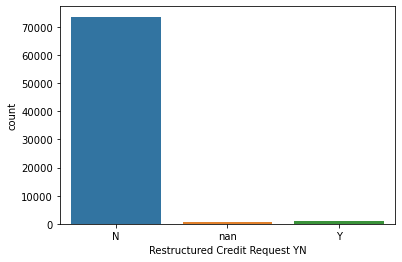

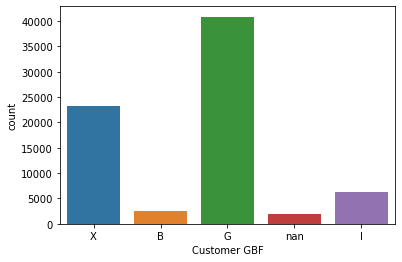

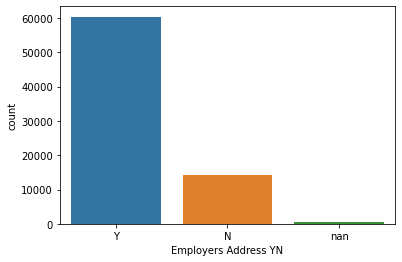

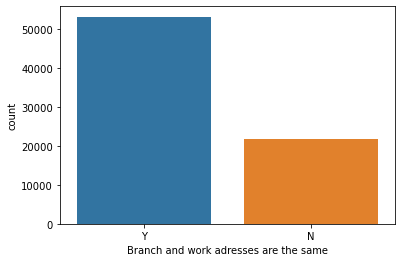

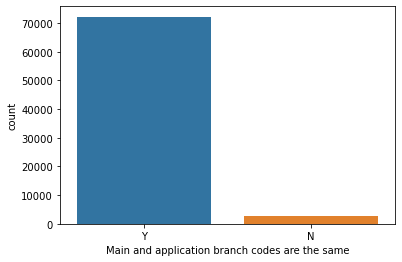

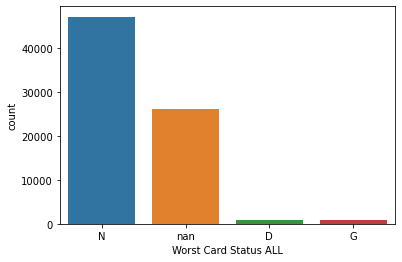

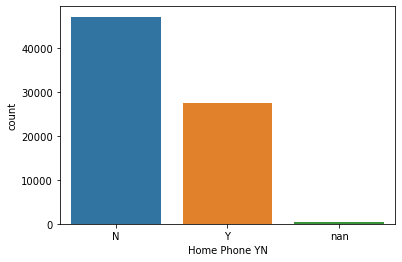

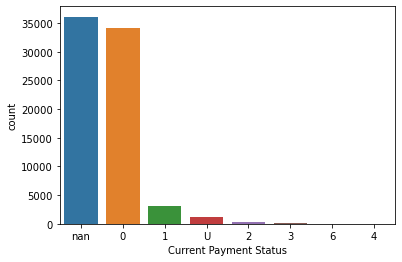

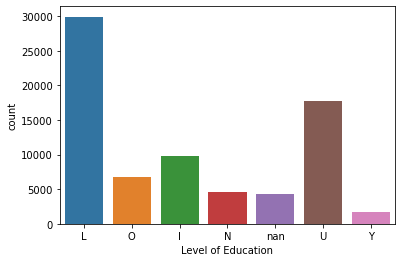

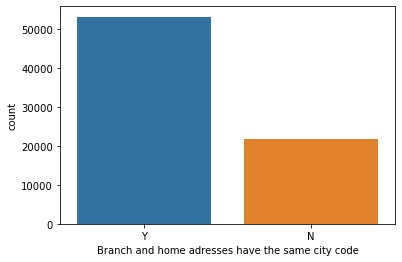

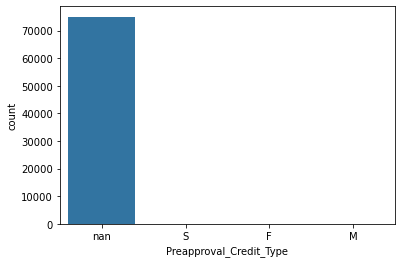

In [32]:
for i, col in enumerate(data_master[possible_cat]):
    plt.figure(i)
    sns.countplot(x = col, data = data_master, orient = "h")

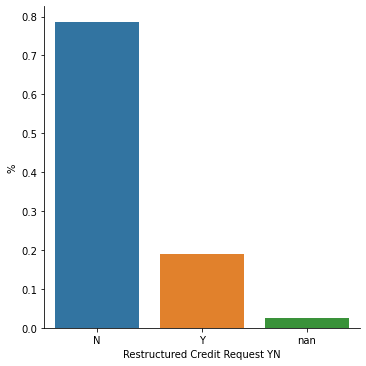

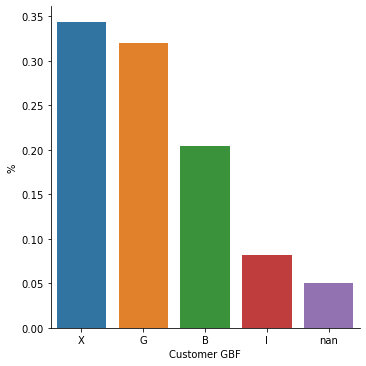

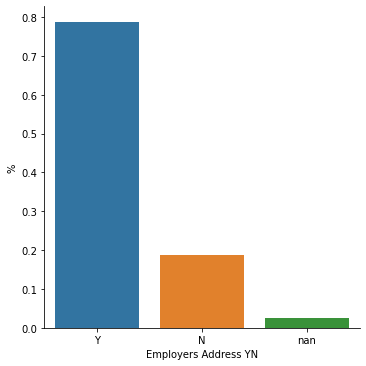

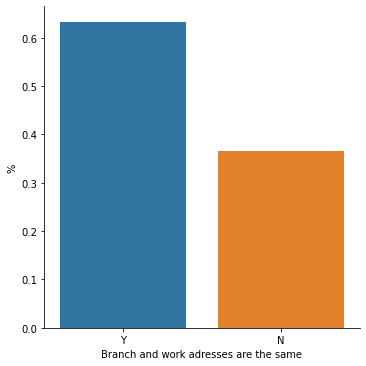

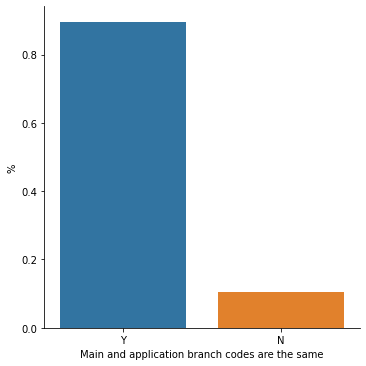

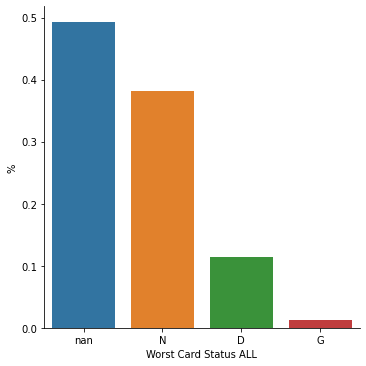

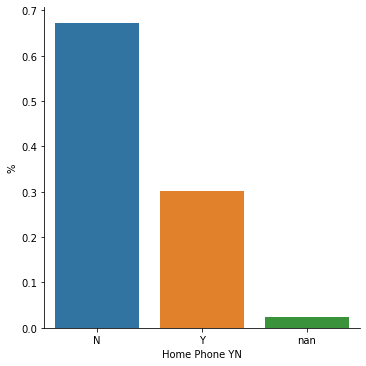

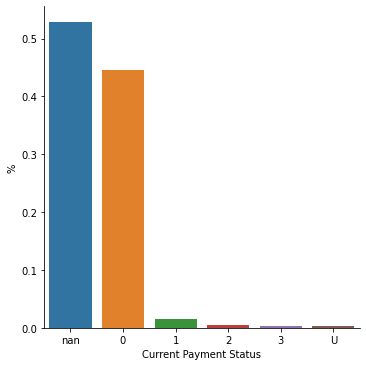

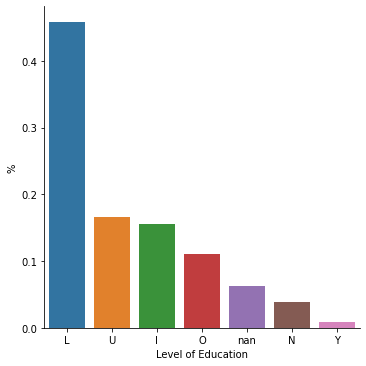

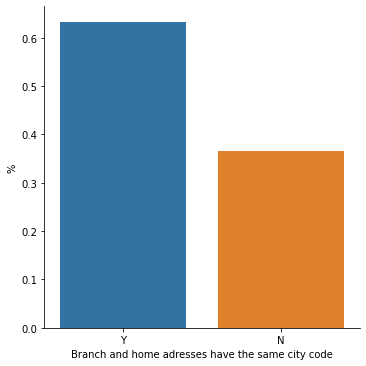

In [33]:
for i, col in enumerate(possible_cat[:-1]):
    (data_master[data_master["Target"] == 1].groupby("Target")[col].value_counts(normalize=True).rename('%').reset_index().pipe((sns.catplot,'data'), x=col, y='%',kind='bar'))

##### There can be differences between two populations of target( 0, 1). Let’s analyse statically whether there exist differences between categorical columns for both classes. For the categorical values, chi-square test should be applied. 

##### 2.5.2) Chisquare Test for Categorical Columns<a class="anchor" id="section_2_5_2"></a>

In [34]:
df_compare = data_master.loc[data_master['Target'] == 0]
df_compare.shape

(74250, 41)

For null hypotheses which have p value less than 0.05, it can be rejected that  both distributions are equal to each other. For the others, ıt cannot be rejected.

In [35]:
for i in possible_cat[:-1]:
    print("-"*100)
    print(i)
    
    _, dist1 = np.unique(data_master[i], return_counts = True) 
    _, dist2 = np.unique(df_compare[i], return_counts = True) 

    expected = df_compare.shape[0] * dist1 / np.sum(dist1) 
    observed = dist2

    test_result = stats.chisquare(observed, expected)
    print("Chi-square test result is: ", test_result.pvalue)
    if test_result.pvalue < 0.05:
        print("There exist \033[4mdifference\033[0m between target classes for '" + i + "'.")
    else:
        print("There exist \033[4mno difference\033[0m between target classes for '" + i + "' .")

----------------------------------------------------------------------------------------------------
Restructured Credit Request YN
Chi-square test result is:  2.5785811374691204e-05
There exist difference between target classes for 'Restructured Credit Request YN'.
----------------------------------------------------------------------------------------------------
Customer GBF
Chi-square test result is:  0.13005903468805824
There exist no difference between target classes for 'Customer GBF' .
----------------------------------------------------------------------------------------------------
Employers Address YN
Chi-square test result is:  0.8313188043359893
There exist no difference between target classes for 'Employers Address YN' .
----------------------------------------------------------------------------------------------------
Branch and work adresses are the same
Chi-square test result is:  0.6495237713586255
There exist no difference between target classes for 'Branch and wor

#### 2.6) Correlation Analyses<a class="anchor" id="section_2_6"></a>

Let's analyse the correlation between columns. Data is highly imbalanced so that it doesn’t generate meaningful results by analysing in a standard way. 

Therefore, undersampling will be applied so that there will be better understanding between target and feature columns. Ratio of ones will be increased to 50 percent. After that correlation analysis will be applied on that data.

In [36]:
df = data_master.sample(frac=1, random_state = 42)

ones_df = df.loc[df['Target'] == 1]
zeros_df = df.loc[df['Target'] == 0].sample(n=data_master['Target'].value_counts()[1], random_state = 45)

##### 2.6.1) Correlation Analyses for Numerical Columns <a class="anchor" id="section_2_6_1"></a>

#### Let’s check whether undersampling data comes from the same distribution or not for numerical columns.

Kolmogorov-Smirnov test is applied but it requires that data size should be equal to each other. If the success ratio of tests are higher, it can be stated undersampled data come from the same distribution

In [37]:
def func_check_distribution(df, df_1, size, column_name):
    list_1 = []
    for i in range(100):
        df_2 = df.loc[df['Target'] == 0].sample(n=size, random_state = i+100)
        result = stats.ks_2samp(df_1[column_name], df_2[column_name])
        list_1.append(result.pvalue)
    print('Succeeded test number:' + str(sum(1 for a in list_1 if a > 0.05)))
    print('Succees ratio:', sum(list_1)/len(list_1))
        
    

In [38]:
for feature in possible_num[1:]:
    print("-"*100)
    print(feature)
    func_check_distribution(df, zeros_df, ones_df.shape[0], feature)

----------------------------------------------------------------------------------------------------
CC_LO_MO_OD_L6M
Succeeded test number:100
Succees ratio: 0.84063488447077
----------------------------------------------------------------------------------------------------
KKB Bureau Score
Succeeded test number:100
Succees ratio: 0.6377510346876311
----------------------------------------------------------------------------------------------------
CC Total Payment of all Credit cards
Succeeded test number:98
Succees ratio: 0.5392425907743335
----------------------------------------------------------------------------------------------------
CC_LO_OD_L1M
Succeeded test number:100
Succees ratio: 0.88075699835356
----------------------------------------------------------------------------------------------------
Müşteri Dönem Aktif
Succeeded test number:100
Succees ratio: 0.8548099441812813
-------------------------------------------------------------------------------------------------

##### It can be stated that undersampling data reflect the same distribution.

##### 2.6.2) Correlation Analyses for Categorical Columns<a class="anchor" id="section_2_6_2"></a>

For categorical columns ,Chi-square test will be applied. It doesn’t need to have same number of obsrevations.

In [39]:
def func_check_dist_categorcial(df, df_2, column_name):
    _, dist1 = np.unique(df[i], return_counts = True)
    _, dist2 = np.unique(df_2[i], return_counts = True) 
    expected = 750 * dist1 / np.sum(dist1) 
    observed = dist2
    test_result = stats.chisquare(observed, expected)
    print("Test results are", test_result.pvalue)

In [40]:
df_compare = df.loc[df['Target'] == 0]
for feature in possible_cat:
    print("-"*100)
    print(feature)
    func_check_dist_categorcial(df_compare, zeros_df, column_name)


----------------------------------------------------------------------------------------------------
Restructured Credit Request YN
Test results are 0.9902805221059156
----------------------------------------------------------------------------------------------------
Customer GBF
Test results are 0.9902805221059156
----------------------------------------------------------------------------------------------------
Employers Address YN
Test results are 0.9902805221059156
----------------------------------------------------------------------------------------------------
Branch and work adresses are the same
Test results are 0.9902805221059156
----------------------------------------------------------------------------------------------------
Main and application branch codes are the same
Test results are 0.9902805221059156
----------------------------------------------------------------------------------------------------
Worst Card Status ALL
Test results are 0.9902805221059156
------

##### It can be stated that undersampled data reflects the same distribution for categorical colum

It is proved that undersampled data reflects the same distribution with the main dataframe.

In [41]:
proved_df = pd.concat([ones_df, zeros_df])

df_sampled = proved_df.sample(frac=1, random_state=45)

df_sampled.head()

,Target,Restructured Credit Request YN,Customer GBF,CC_LO_MO_OD_L6M,KKB Bureau Score,CC Total Payment of all Credit cards,CC_LO_OD_L1M,Employers Address YN,Branch and work adresses are the same,Main and application branch codes are the same,Müşteri Dönem Aktif,Monthly Family Income,OD Number of months in 1 delay_L24M,OD Number of months in 2 delay_L12M,CC Number of months in 2 delay_L24M,Kullandırım Hazırlık,Şube Müdürü Görüşü,Şube Kaps Kontrolü,CC Tot Limit YTL,Total_of_Monthly_Instalment / Total_Assets,CC_Total_Payment_Balance_Rate,Worst Card Status ALL,Home Phone YN,Şube Pazarlama Eksiklik Görüşü,GUA_Num Unpaid Cheques L6M,Number of Limit Increase Rejects in L3M,Total_of_Monthly_Instalment / Monthly Net Income,Residential Status,Max Delinquency Status L6M,Num Unpaid Notes L7M_L12M,Aktif Vadeli Grup,Current Payment Status,Bayii Bekleme Havuzu,Home adress district code,Level of Education,Branch and home adresses have the same city code,LO Tot Balance in Litigation,Num Unpaid Cheques L13M-L24M,MO_Maximum_Mortgage_Limit / Monthly Net Income,GM Kullandırım İşlem,Preapproval_Credit_Type
20444,1,N,I,7.00,1166.00,539.00,1.00,Y,N,Y,0,2500.00,0.00,0.00,0.00,1,0,0,500.00,0.00,0.00,nan,N,0,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0,26.00,L,N,0.00,0.00,0.00,0,nan
54234,1,N,X,2.00,1144.00,107.00,0.00,Y,Y,Y,1,3000.00,0.00,0.00,0.00,0,0,0,384.00,0.00,0.29,N,N,0,0.00,3.00,0.19,4.00,2.00,0.00,0,nan,0,0.00,L,Y,0.00,0.00,0.00,0,nan
55197,0,Y,B,5.00,881.00,35.00,1.00,Y,N,Y,1,1500.00,0.00,0.00,0.00,1,0,0,1250.00,0.00,0.03,G,Y,0,0.00,0.00,0.20,1.00,0.00,0.00,0,0,0,12.00,L,N,0.00,0.00,0.00,1,nan
3480,0,N,I,1.00,1002.00,270.00,1.00,Y,Y,Y,1,2500.00,0.00,0.00,0.00,1,0,0,1500.00,0.00,0.25,N,N,0,0.00,0.00,0.00,1.00,0.00,0.00,0,nan,0,0.00,L,Y,0.00,0.00,0.00,0,nan
18857,0,N,G,1.00,1622.00,1270.00,1.00,N,N,Y,1,3500.00,0.00,0.00,0.00,1,0,0,2600.00,0.00,0.64,N,Y,0,0.00,0.00,0.00,1.00,0.00,0.00,1,0,0,19.00,L,N,0.00,0.00,0.00,0,nan


In [42]:
df_sampled.corr()

,Target,CC_LO_MO_OD_L6M,KKB Bureau Score,CC Total Payment of all Credit cards,CC_LO_OD_L1M,Müşteri Dönem Aktif,Monthly Family Income,OD Number of months in 1 delay_L24M,OD Number of months in 2 delay_L12M,CC Number of months in 2 delay_L24M,Kullandırım Hazırlık,Şube Müdürü Görüşü,Şube Kaps Kontrolü,CC Tot Limit YTL,Total_of_Monthly_Instalment / Total_Assets,CC_Total_Payment_Balance_Rate,Şube Pazarlama Eksiklik Görüşü,GUA_Num Unpaid Cheques L6M,Number of Limit Increase Rejects in L3M,Total_of_Monthly_Instalment / Monthly Net Income,Residential Status,Max Delinquency Status L6M,Num Unpaid Notes L7M_L12M,Aktif Vadeli Grup,Bayii Bekleme Havuzu,Home adress district code,LO Tot Balance in Litigation,Num Unpaid Cheques L13M-L24M,MO_Maximum_Mortgage_Limit / Monthly Net Income,GM Kullandırım İşlem
Target,1.00,0.19,-0.31,0.08,0.17,-0.23,0.04,0.11,0.08,0.12,-0.08,-0.04,0.04,0.03,-0.01,0.03,0.12,NaN,0.01,-0.06,0.02,0.18,0.04,-0.16,NaN,-0.01,0.07,0.03,-0.05,0.06
CC_LO_MO_OD_L6M,0.19,1.00,-0.05,0.04,0.54,-0.01,0.03,0.01,0.02,0.04,0.02,-0.01,-0.00,0.05,0.01,0.01,0.03,NaN,-0.02,-0.00,0.09,0.02,-0.03,0.00,NaN,-0.01,0.01,-0.01,-0.00,0.01
KKB Bureau Score,-0.31,-0.05,1.00,-0.05,0.08,-0.10,-0.07,-0.16,-0.12,-0.19,0.21,0.01,0.03,0.04,-0.04,0.04,-0.16,NaN,0.00,-0.03,0.03,-0.33,-0.03,0.10,NaN,-0.01,-0.09,-0.06,0.00,-0.18
CC Total Payment of all Credit cards,0.08,0.04,-0.05,1.00,-0.01,0.08,0.45,0.09,0.07,0.17,-0.01,-0.00,0.00,0.77,0.11,0.05,0.10,NaN,0.02,0.01,-0.02,0.15,0.00,0.05,NaN,0.00,0.08,-0.00,0.02,0.18
CC_LO_OD_L1M,0.17,0.54,0.08,-0.01,1.00,-0.20,-0.01,-0.05,-0.05,-0.06,0.01,-0.01,0.06,0.00,0.00,0.02,-0.01,NaN,-0.04,-0.03,0.01,-0.09,-0.03,-0.02,NaN,-0.02,0.03,-0.02,-0.01,-0.06
Müşteri Dönem Aktif,-0.23,-0.01,-0.10,0.08,-0.20,1.00,0.07,0.12,0.08,0.09,0.07,-0.01,-0.05,0.09,0.03,-0.03,0.10,NaN,0.07,0.15,0.08,0.24,0.03,0.13,NaN,0.06,0.04,0.02,0.05,0.15
Monthly Family Income,0.04,0.03,-0.07,0.45,-0.01,0.07,1.00,0.07,0.04,0.08,-0.00,0.00,-0.00,0.47,0.19,-0.00,0.13,NaN,-0.00,0.00,-0.06,0.14,0.02,0.05,NaN,0.03,0.28,0.03,0.02,0.19
OD Number of months in 1 delay_L24M,0.11,0.01,-0.16,0.09,-0.05,0.12,0.07,1.00,0.65,0.56,-0.27,-0.01,-0.01,0.11,0.06,-0.01,0.25,NaN,-0.01,0.04,0.04,0.24,-0.01,-0.03,NaN,-0.07,0.07,-0.00,0.01,-0.04
OD Number of months in 2 delay_L12M,0.08,0.02,-0.12,0.07,-0.05,0.08,0.04,0.65,1.00,0.52,-0.19,-0.00,-0.00,0.06,-0.01,-0.00,0.22,NaN,0.01,0.05,0.02,0.22,-0.00,-0.02,NaN,-0.03,0.08,-0.00,0.01,-0.03
CC Number of months in 2 delay_L24M,0.12,0.04,-0.19,0.17,-0.06,0.09,0.08,0.56,0.52,1.00,-0.28,-0.01,-0.01,0.15,0.15,-0.01,0.28,NaN,-0.01,0.04,0.02,0.39,-0.01,-0.01,NaN,-0.02,0.08,-0.00,0.04,-0.04


In [43]:
### Features with high correlation are selected for further investigation. 
corr_feats = ['Target', 'CC_LO_MO_OD_L6M', 'KKB Bureau Score', 
              'CC_LO_OD_L1M', 'Müşteri Dönem Aktif',
              'OD Number of months in 1 delay_L24M', 'OD Number of months in 2 delay_L12M', 'CC Number of months in 2 delay_L24M',
              'Max Delinquency Status L6M']

<AxesSubplot:>

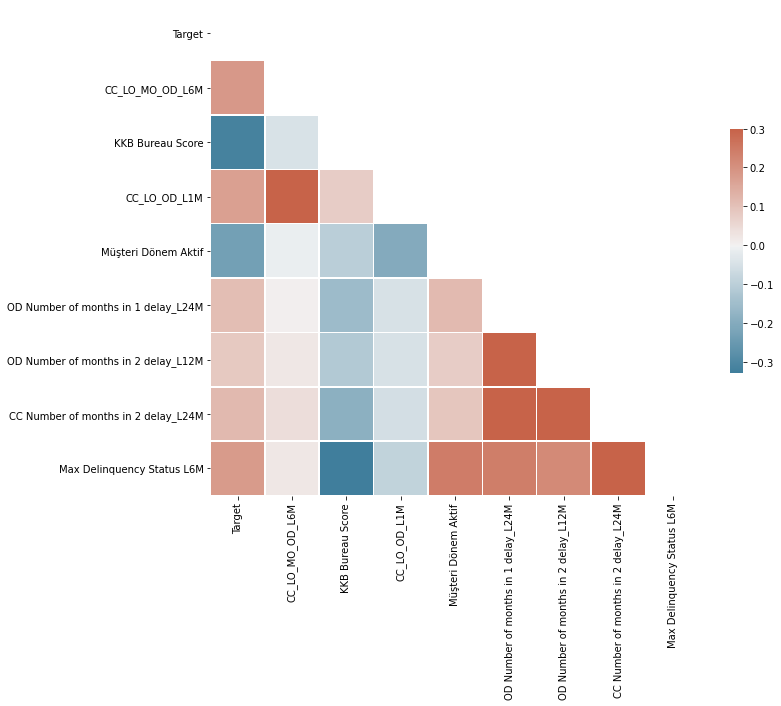

In [44]:
corr = df_sampled[corr_feats].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})